# Part 1: Advanced Exploratory Data Analysis (EDA)

## Import Dependansies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# 1.1 Initial Data Assessment

In [10]:
df = pd.read_csv(r'd:\Zuu Crew\Mini_project_00\Project00\data\raw\Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 1.1.1 Data Quality Check: Examine data types, missing values, and inconsistencies

#### 1.1.1.1 Examine data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Numerical Values are : tenure, MonthlyCharges and TotalCharges ---> in the above file types 'TotalCharges' having object datatype, so should be check is there any null values occur in this as string

In [12]:
non_numeric = df[~df['TotalCharges'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['TotalCharges']
print(non_numeric.unique())

[' ']


- Replace empty spaces by NaN, and then convert columns as a float, then fill NaN with the median

In [13]:
df["TotalCharges"]= df["TotalCharges"].replace(" ",np.nan)
df["TotalCharges"]= df["TotalCharges"].astype(float)
df["TotalCharges"]= df["TotalCharges"].fillna(df["TotalCharges"].median())
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### 1.1.1.2 Remove inconsistencies

- Removing 'customerID' column

In [14]:
df_cp = df.drop('customerID', axis=1)
df_cp.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


#### 1.1.1.3 missing values Analysis

- Analyse the unique values which include in the dataset

In [15]:
for col in df_cp.columns:
    print(f"{col}: {df_cp[col].unique()}")

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

- Identified there are no any null values include in the categorical columns. Then, we can analyze the numerical columns with whole columns whether null values exist

In [16]:
df_cp.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Verified there are not exist any null values as categorical or numerical columns

### 1.1.2 Target Variable Analysis: Calculate churn rate and discuss class imbalance implications

- In here i apply categorical features and then adding bining for numerical features because of representation purpose.

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


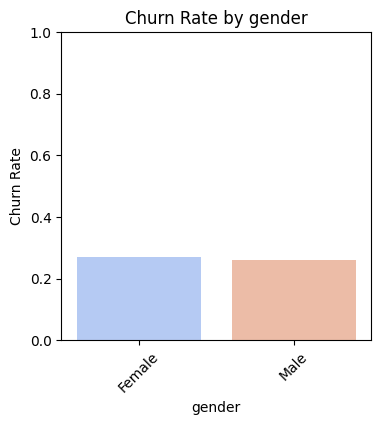

Highest churn rate for gender: Female (26.92%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


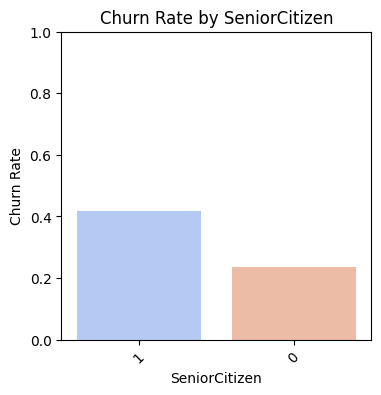

Highest churn rate for SeniorCitizen: 1 (41.68%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


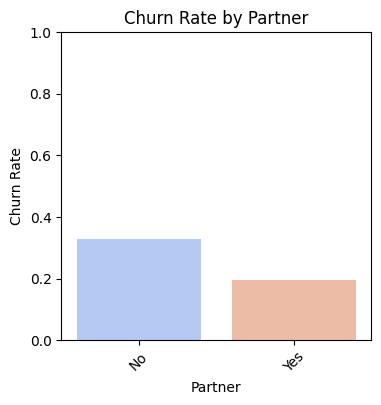

Highest churn rate for Partner: No (32.96%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


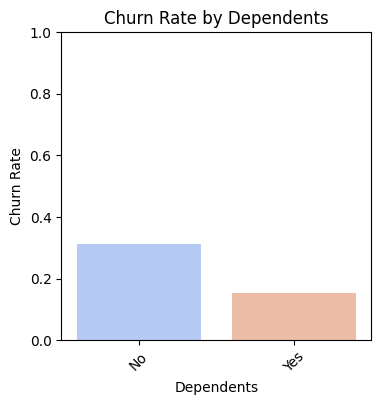

Highest churn rate for Dependents: No (31.28%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


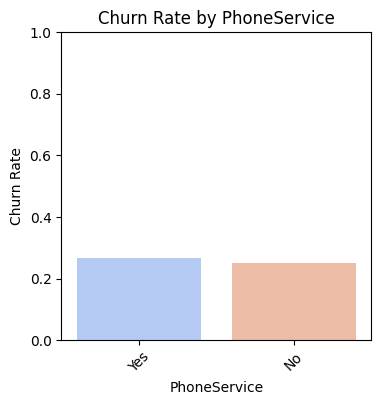

Highest churn rate for PhoneService: Yes (26.71%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


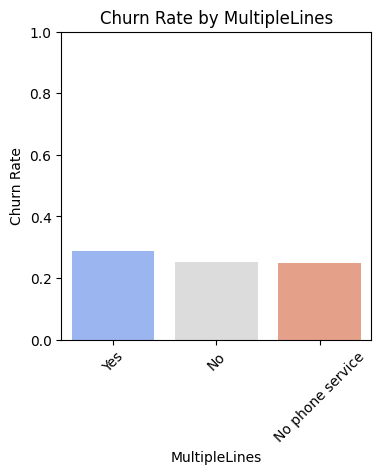

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


Highest churn rate for MultipleLines: Yes (28.61%)



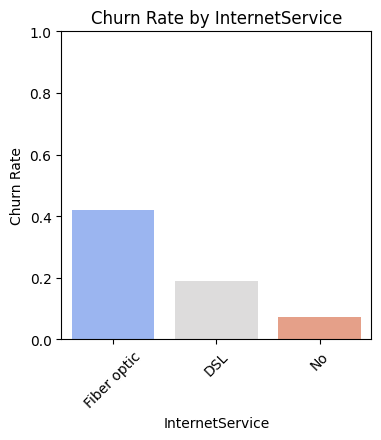

Highest churn rate for InternetService: Fiber optic (41.89%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


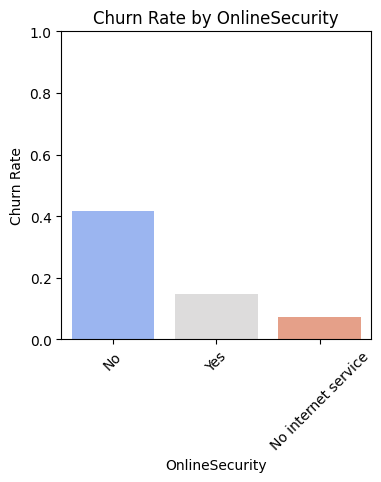

Highest churn rate for OnlineSecurity: No (41.77%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


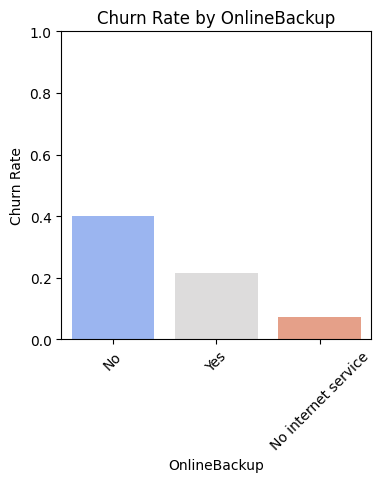

Highest churn rate for OnlineBackup: No (39.93%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


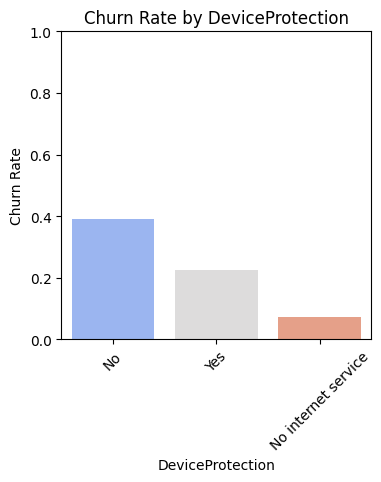

Highest churn rate for DeviceProtection: No (39.13%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


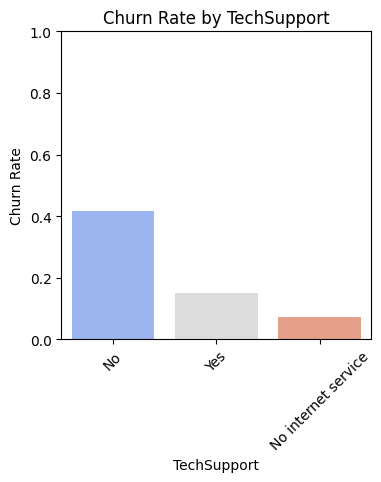

Highest churn rate for TechSupport: No (41.64%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


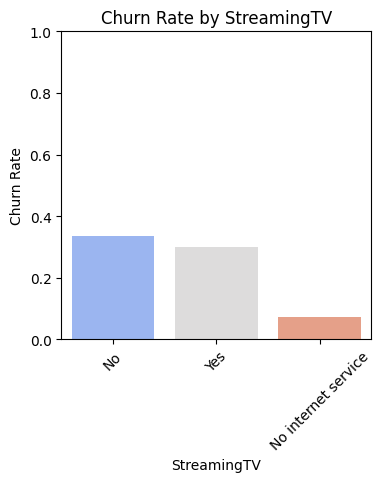

Highest churn rate for StreamingTV: No (33.52%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


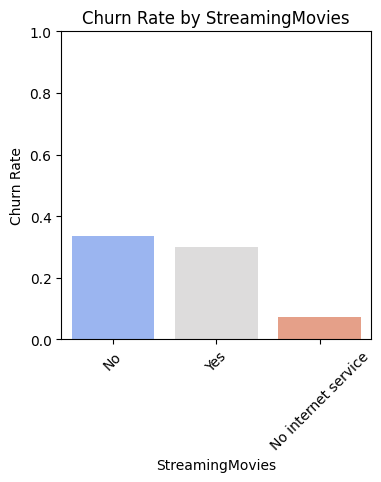

Highest churn rate for StreamingMovies: No (33.68%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


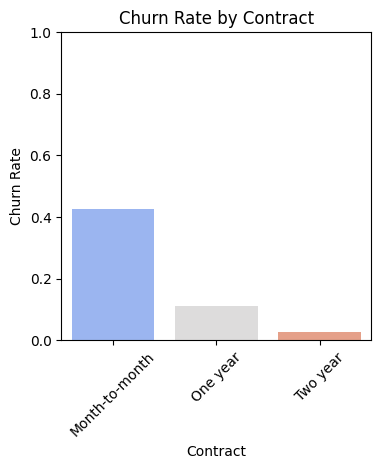

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


Highest churn rate for Contract: Month-to-month (42.71%)



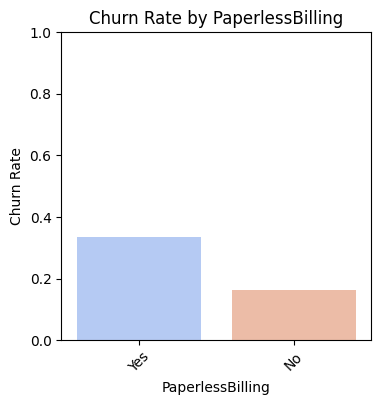

Highest churn rate for PaperlessBilling: Yes (33.57%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


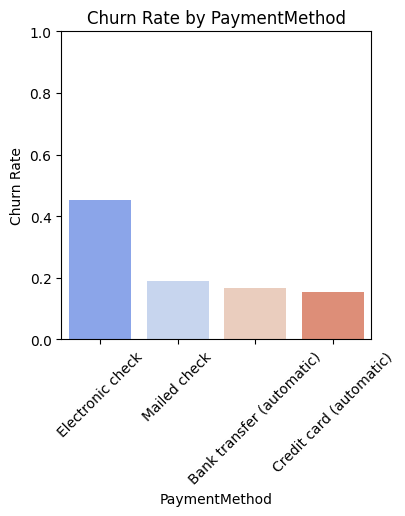

Highest churn rate for PaymentMethod: Electronic check (45.29%)



C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_table = df.groupby(group_feature)[target].agg(['count', 'sum'])
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


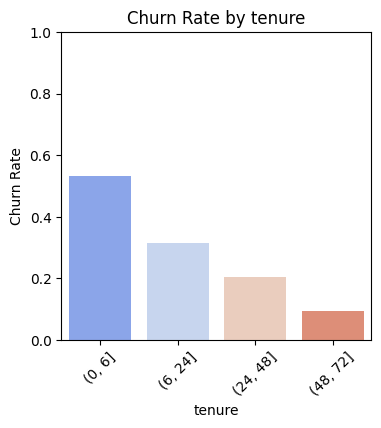

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_table = df.groupby(group_feature)[target].agg(['count', 'sum'])
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


Highest churn rate for tenure: (0, 6] (53.33%)



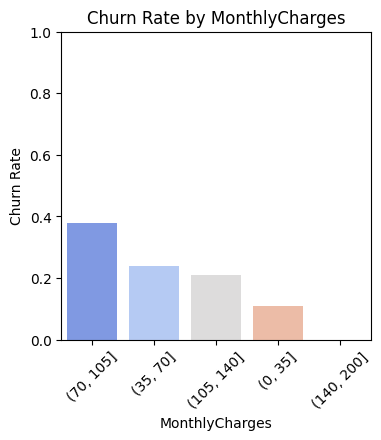

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_table = df.groupby(group_feature)[target].agg(['count', 'sum'])
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\417056536.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')


Highest churn rate for MonthlyCharges: (70, 105] (37.81%)



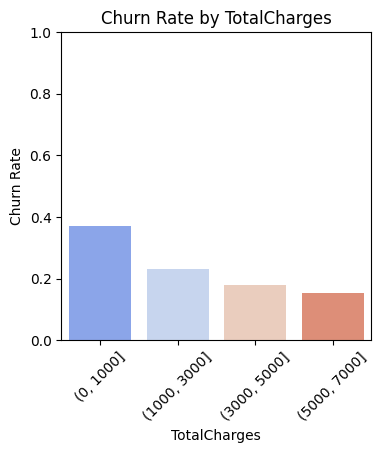

Highest churn rate for TotalCharges: (0, 1000] (36.99%)



In [17]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

def churn_rate_by_class_plot(df, feature, target='Churn', bins=None):
    if bins is not None:
        df[f'{feature}_binned'] = pd.cut(df[feature], bins=bins)
        group_feature = f'{feature}_binned'
    else:
        group_feature = feature

    churn_table = df.groupby(group_feature)[target].agg(['count', 'sum'])
    churn_table['churn_rate'] = churn_table['sum'] / churn_table['count']
    churn_table = churn_table.sort_values(by='churn_rate', ascending=False)
    
    plt.figure(figsize=(4,4))
    sns.barplot(x=churn_table.index.astype(str), y=churn_table['churn_rate'], palette='coolwarm')
    plt.title(f'Churn Rate by {feature}')
    plt.ylabel('Churn Rate')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()

    highest_risk = churn_table['churn_rate'].idxmax()
    print(f"Highest churn rate for {feature}: {highest_risk} ({churn_table.loc[highest_risk,'churn_rate']:.2%})\n")

for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod']:
    churn_rate_by_class_plot(df, col)

tenure_bins = [0, 6, 24, 48, 72]
churn_rate_by_class_plot(df, 'tenure', bins=tenure_bins)

monthly_bins = [0, 35, 70, 105, 140, 200]
churn_rate_by_class_plot(df, 'MonthlyCharges', bins=monthly_bins)

total_bins = [0, 1000, 3000, 5000, 7000]
churn_rate_by_class_plot(df, 'TotalCharges', bins=total_bins)


- Highest Churn Rate FIlterring : 
    - Female (26.92%)
    - SeniorCitizen: 1 (41.68%)
    - Partner: No (32.96%)
    - Dependents: No (31.28%)
    - PhoneService: Yes (26.71%)
    - MultipleLines: Yes (28.61%)
    - InternetService: Fiber optic (41.89%)
    - OnlineSecurity: No (41.77%)
    - OnlineBackup: No (39.93%)
    - DeviceProtection: No (39.13%)
    - TechSupport: No (41.64%)
    - StreamingTV: No (33.52%)
    - StreamingMovies: No (33.68%)
    - Contract: Month-to-month (42.71%)
    - PaperlessBilling: Yes (33.57%)
    - PaymentMethod: Electronic check (45.29%)
    - tenure: (0, 6] (53.33%)
    - MonthlyCharges: (70, 105] (37.81%)
    - TotalCharges: (0, 1000] (36.99%)

### 1.1.3 Feature Overview: Categorize features into demographic, behavioral, and financial groups

In [18]:
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
behavioral_features = [
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling'
]
financial_features = ['PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# 1.2 Class Imbalance Analysis

### 1.2.1 Visualize class Distribution

In [19]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

def hist_boxplot(df, cols):
    fig, axes = plt.subplots(2, len(cols), figsize=(5 * len(cols), 8))

    for i, col in enumerate(cols):
        sns.histplot(
            data=df, x=col, ax=axes[0, i], kde=True, color='#9EBC8A'
        )
        axes[0, i].set_title(f'Histogram of {col}', color='#537D5D')
        
        sns.boxplot(
            data=df, x=col, ax=axes[1, i], color='#73946B'
        )
        axes[1, i].set_title(f'Boxplot of {col}', color='#537D5D')

    plt.tight_layout()
    plt.show()

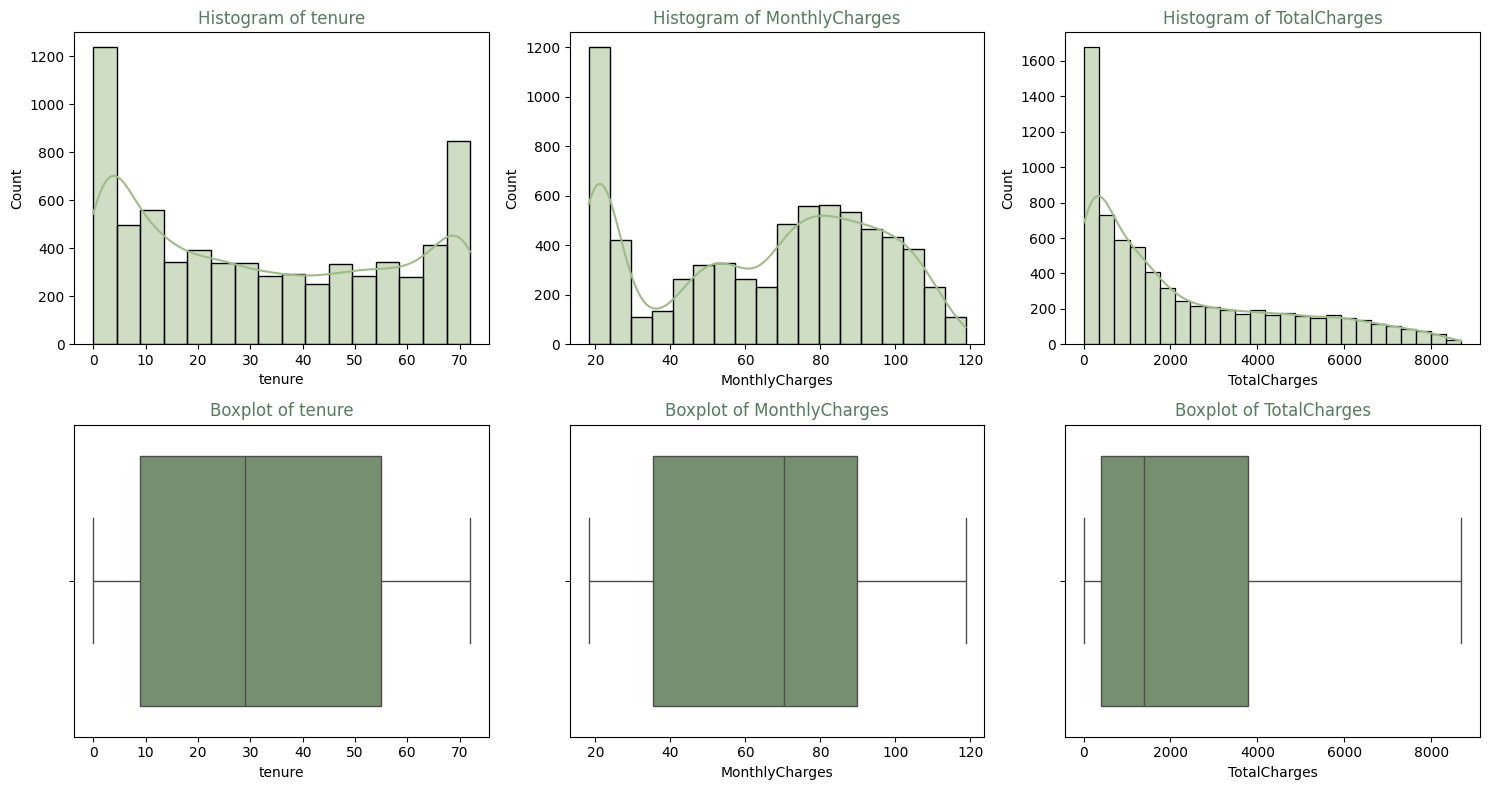

In [20]:
hist_boxplot(df_cp, numerical_columns)

In [21]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

def bar_chart(df, columns):
    custom_palette = ['#73946B', '#9EBC8A', '#DDEB9D', 
                      '#F8ED8C', '#F9C784', '#FCAF58', '#F98948']

    num_cols = 4 
    num_rows = int(np.ceil(len(columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        value_counts = df[column].value_counts()  

        colors = (custom_palette * ((len(value_counts) // len(custom_palette)) + 1))[:len(value_counts)]

        bars = axes[i].bar(value_counts.index, value_counts.values, color=colors)
        for bar in bars:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                height + (0.02 * height), 
                f'{int(height)}',
                ha='center', va='bottom',
                fontsize=10, color='black'
            )

        axes[i].set_title(f"Distribution of {column}", fontsize=12)
        axes[i].set_ylim(0, max(value_counts.values) * 1.1)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

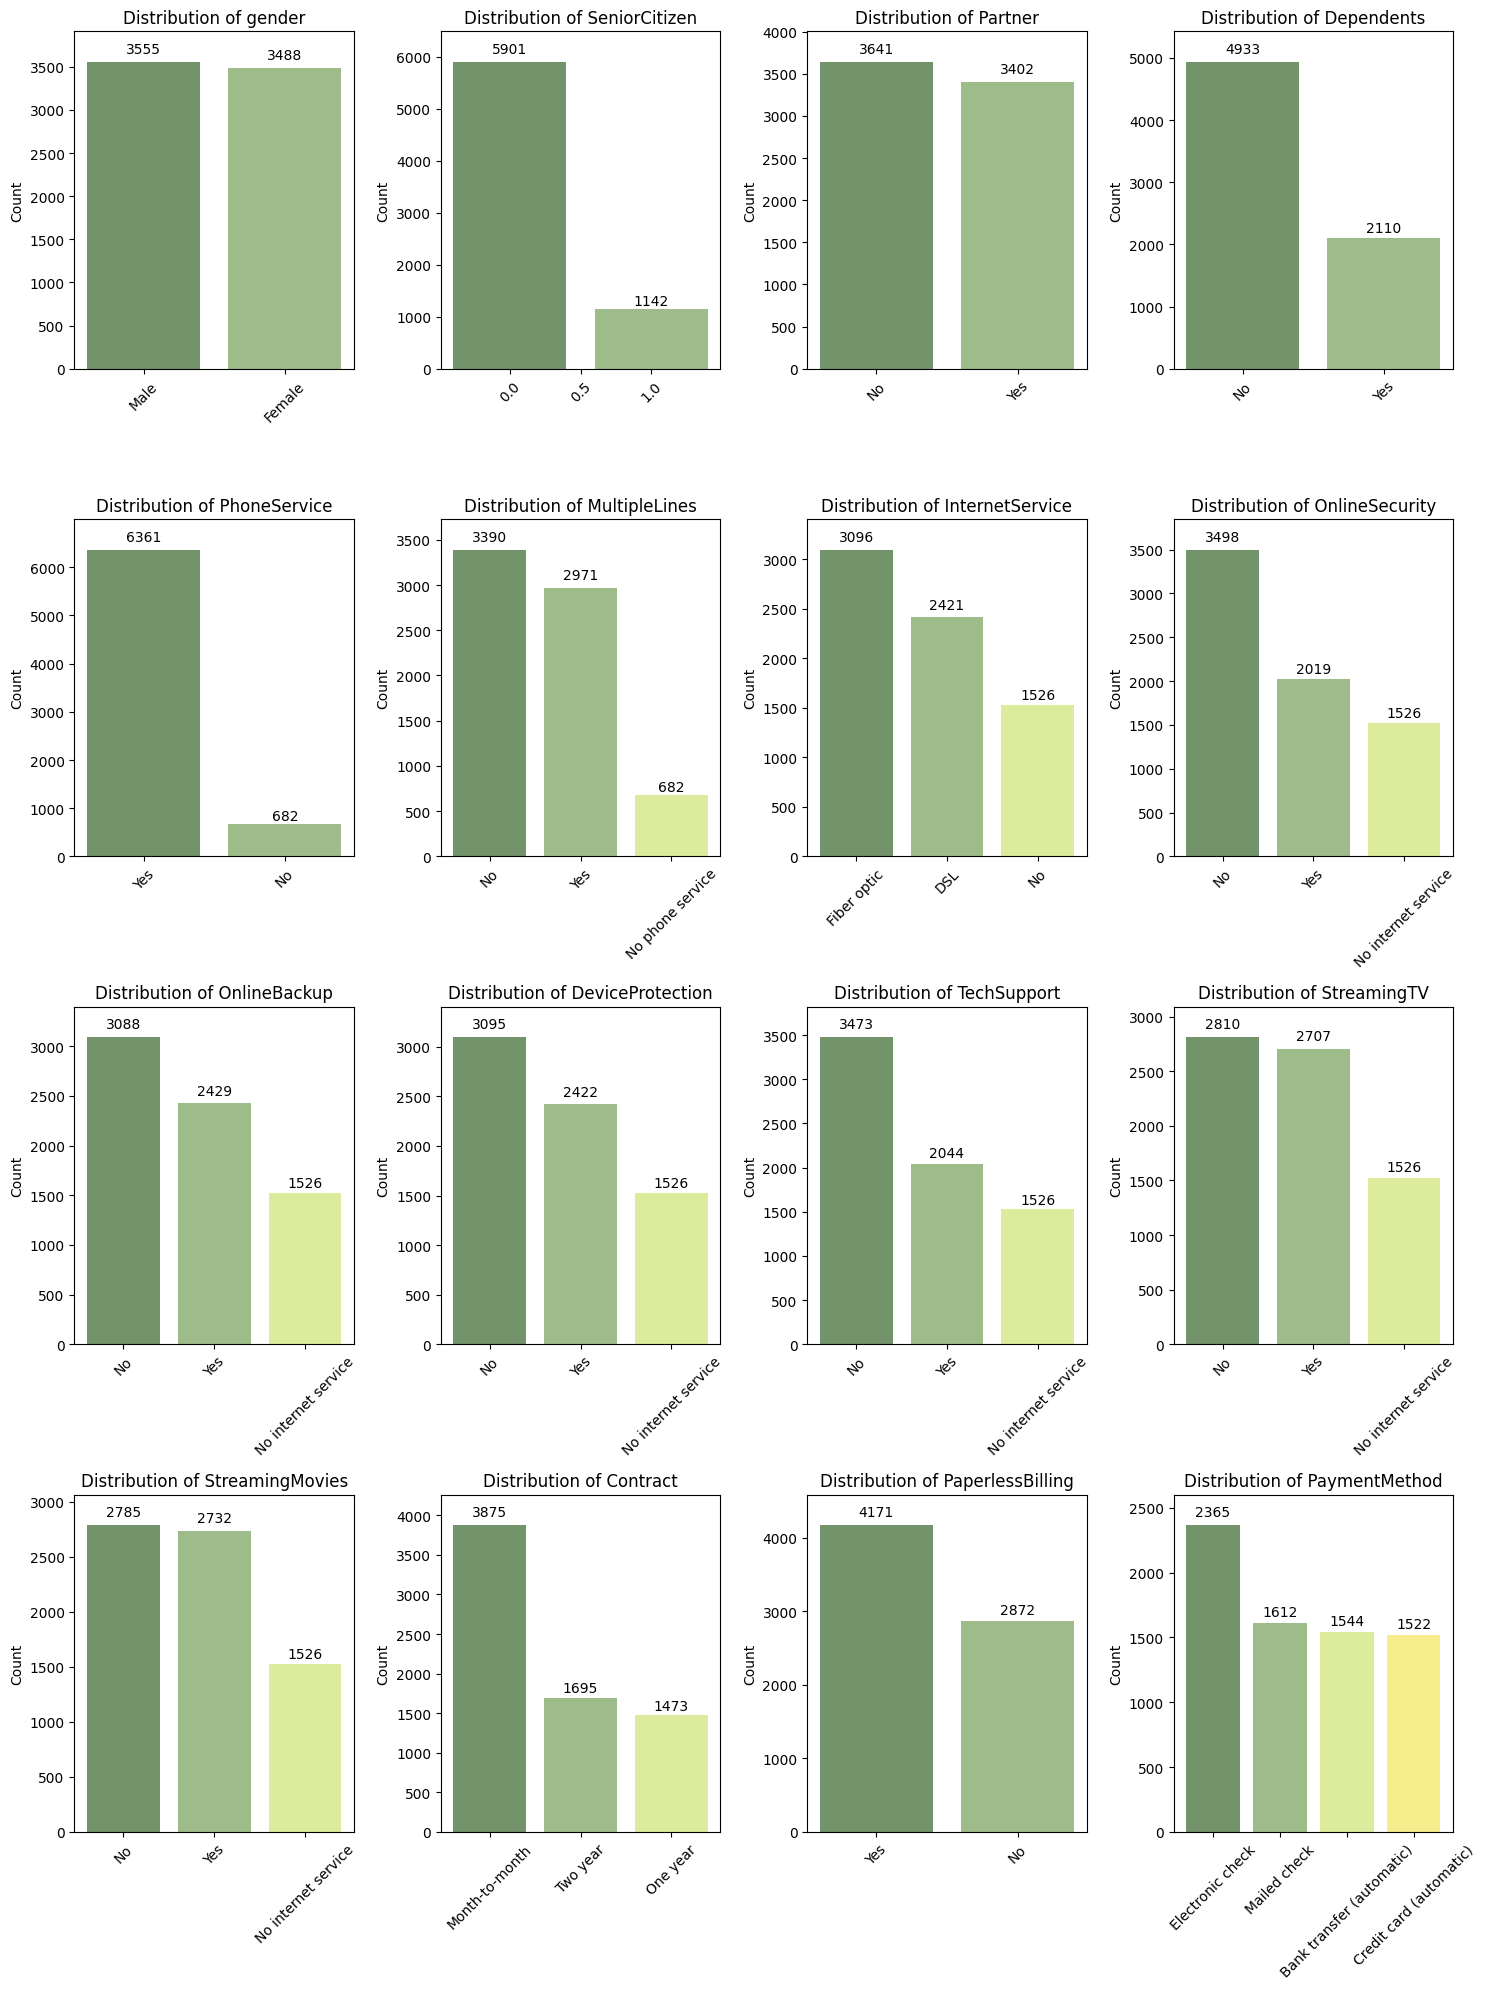

In [22]:
bar_chart(df_cp, categorical_columns)

### 1.2.2 Calculate imbalance ratio

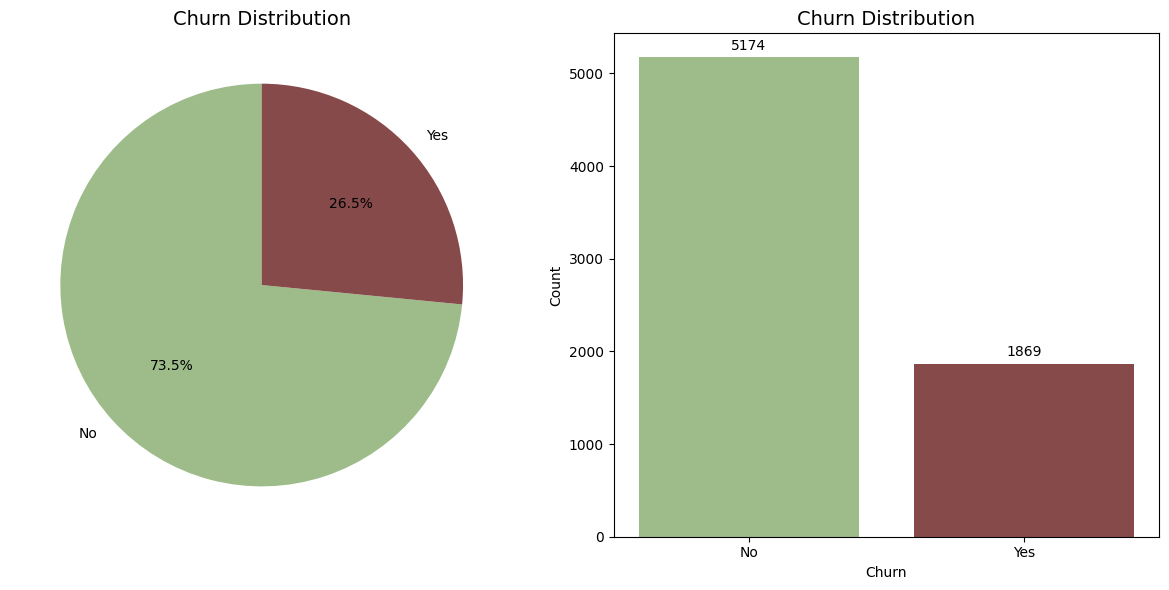

In [23]:
churn_counts = df_cp['Churn'].value_counts()

colors = {'Yes': '#874A4A', 'No': '#9EBC8A'}

# Create subplot (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
 
axes[0].pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[colors[label] for label in churn_counts.index]
)
axes[0].set_title('Churn Distribution', fontsize=14)
 
bars = axes[1].bar(
    churn_counts.index,
    churn_counts.values,
    color=[colors[label] for label in churn_counts.index]
)

for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width()/2, 
        height + (0.01 * max(churn_counts.values)), 
        f'{int(height)}', 
        ha='center', va='bottom', fontsize=10
    )

axes[1].set_title('Churn Distribution', fontsize=14)
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Churn')

plt.tight_layout()
plt.show()

### 1.2.3 Analyze churn patterns

#### 1.2.3.1 For Categorical Varibales

In [24]:
def barchart_stacked(df, features, feature1='Churn'):
    colors = {'Yes': '#ce5454', 'No': '#9EBC8A'}

    ncols = 2
    nrows = int(np.ceil(len(features) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
    axes = axes.flatten()

    for i, feature2 in enumerate(features):
        ax = axes[i]

        data = df.groupby([feature2, feature1]).size().reset_index(name='count')
        pivot_data = data.pivot(index=feature2, columns=feature1, values='count').fillna(0)

        bottom_vals = np.zeros(len(pivot_data))
        for churn_status in colors.keys():
            ax.bar(
                pivot_data.index,
                pivot_data[churn_status],
                bottom=bottom_vals,
                color=colors[churn_status],
                label=churn_status
            )
            for idx, val in enumerate(pivot_data[churn_status]):
                if val > 0:
                    ax.text(
                        idx, 
                        bottom_vals[idx] + val/2,
                        f"{int(val)}",
                        ha='center', va='center',
                        color='white', fontsize=10
                    )
            bottom_vals += pivot_data[churn_status]

        for idx, total in enumerate(bottom_vals):
            ax.text(
                idx,
                total + (max(bottom_vals) * 0.02),
                f"{int(total)}",
                ha='center', va='bottom',
                fontsize=10
            )

        ax.set_title(f'{feature2} vs {feature1}')
        ax.set_xlabel(feature2)
        ax.set_ylabel('Number of Customers')
        ax.set_ylim(0, max(bottom_vals) * 1.15)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

        ax.legend(title=feature1, bbox_to_anchor=(1.05, 1), loc='upper left')

    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom_vals[idx] + val/2,
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:28: FutureWarning: Series.__getitem__ treating keys as positions is depr

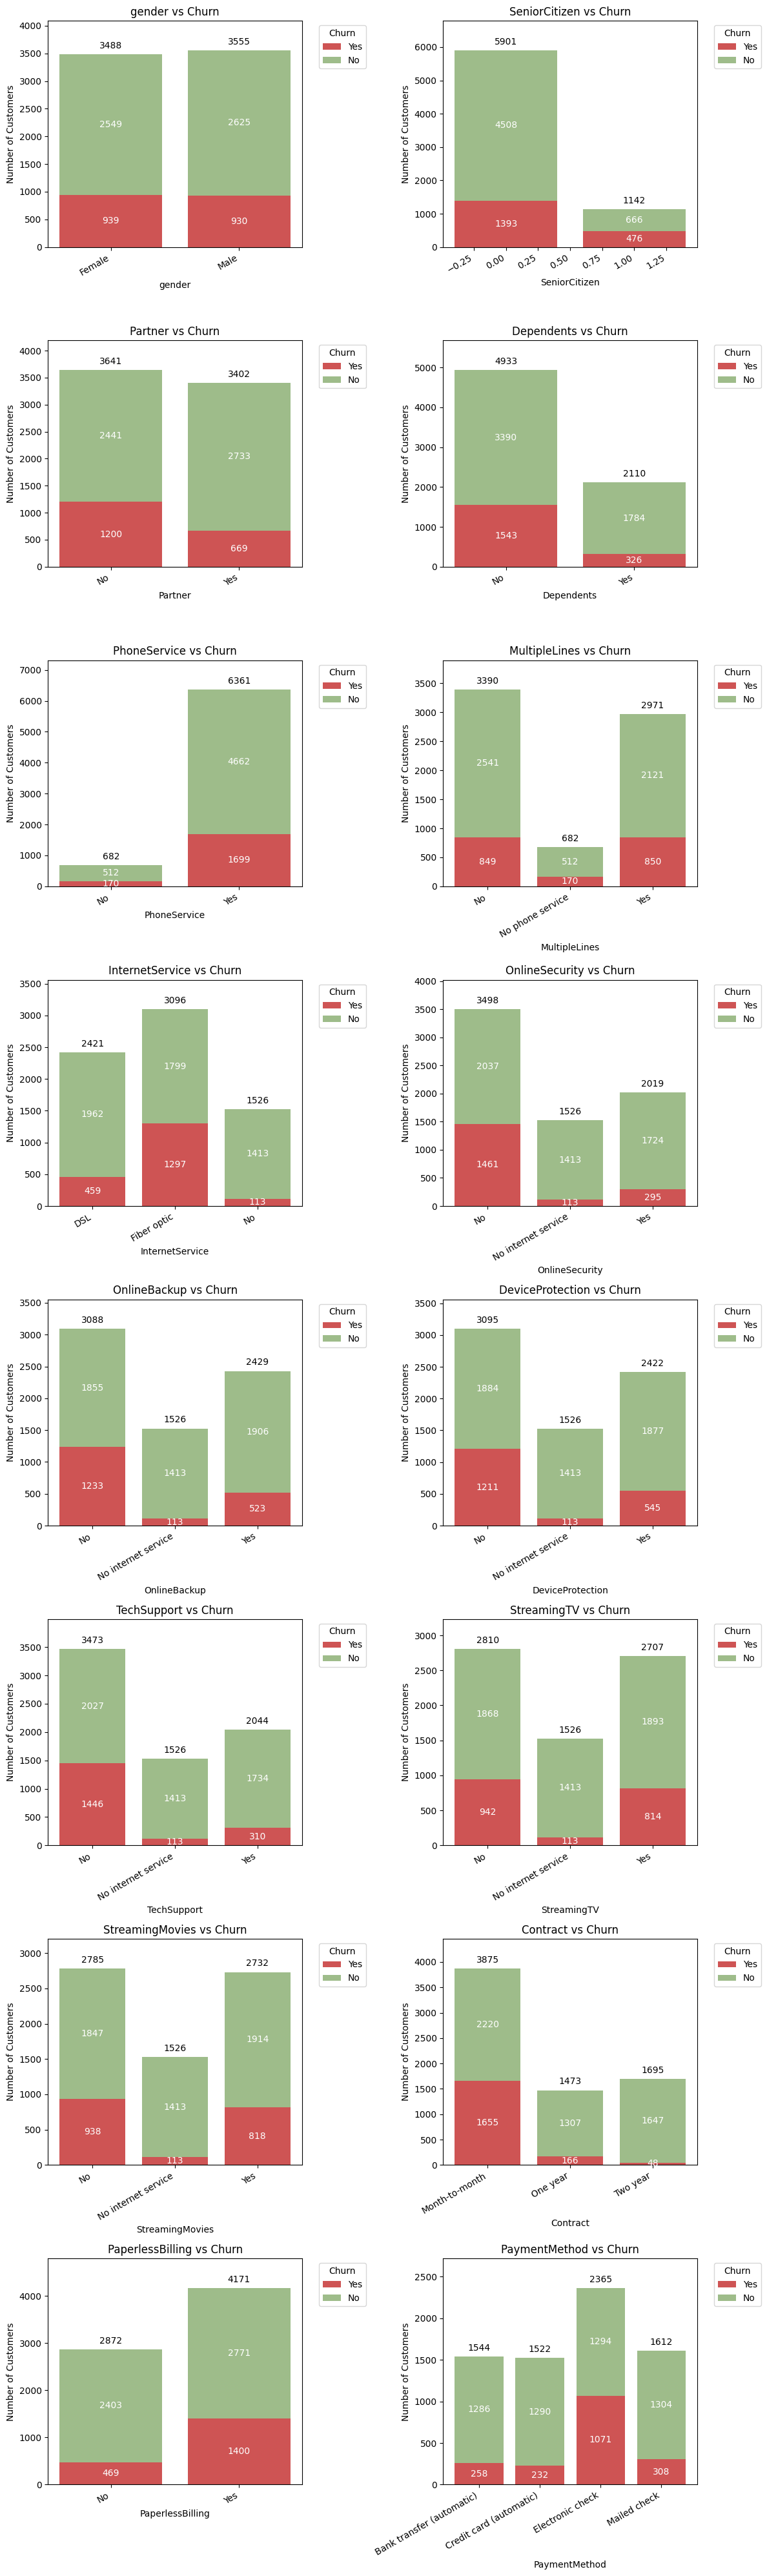

In [25]:
barchart_stacked(df_cp, categorical_columns)

key observations: 
1. Contract type: Month-to-month customers churn most; long-term contracts reduce churn.

2. Payment method: Electronic check users show higher churn than other methods.

3. Internet services/add-ons: Lack of OnlineSecurity, TechSupport, or DeviceProtection links to higher churn.

4. Paperless billing: Associated with higher churn, likely tied to payment/contract factors.

5. Demographics: Senior citizens, partners, and dependents show smaller churn differences.

Service features and payment/contract types are strong churn predictors; demographics play a secondary role.

#### 1.2.3.2 For Numerical Varibales

In [26]:
def displot(df, features, feature1='Churn'):
    n_features = len(features)
    ncols = 1
    nrows = (n_features + 1) // 1
    
    plt.figure(figsize=(12, 5*nrows))
    
    palette = {
        'Yes': '#ce5454',    
        'No' : '#9EBC8A'    
    }
    
    for i, feature2 in enumerate(features, 1):
        plt.subplot(nrows, ncols, i)
        
        for cls in df[feature1].unique():
            subset = df[df[feature1] == cls]
            sns.kdeplot(subset[feature2], 
                        shade=True, 
                        alpha=0.5, 
                        color=palette[cls], 
                        label='Churn' if cls == 'Yes' else 'Not Churn')
        
        plt.title(f'{feature2} vs {feature1}')
        plt.xlabel(feature2)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\357774880.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[feature2],
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\357774880.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[feature2],
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\357774880.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[feature2],
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\357774880.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sn

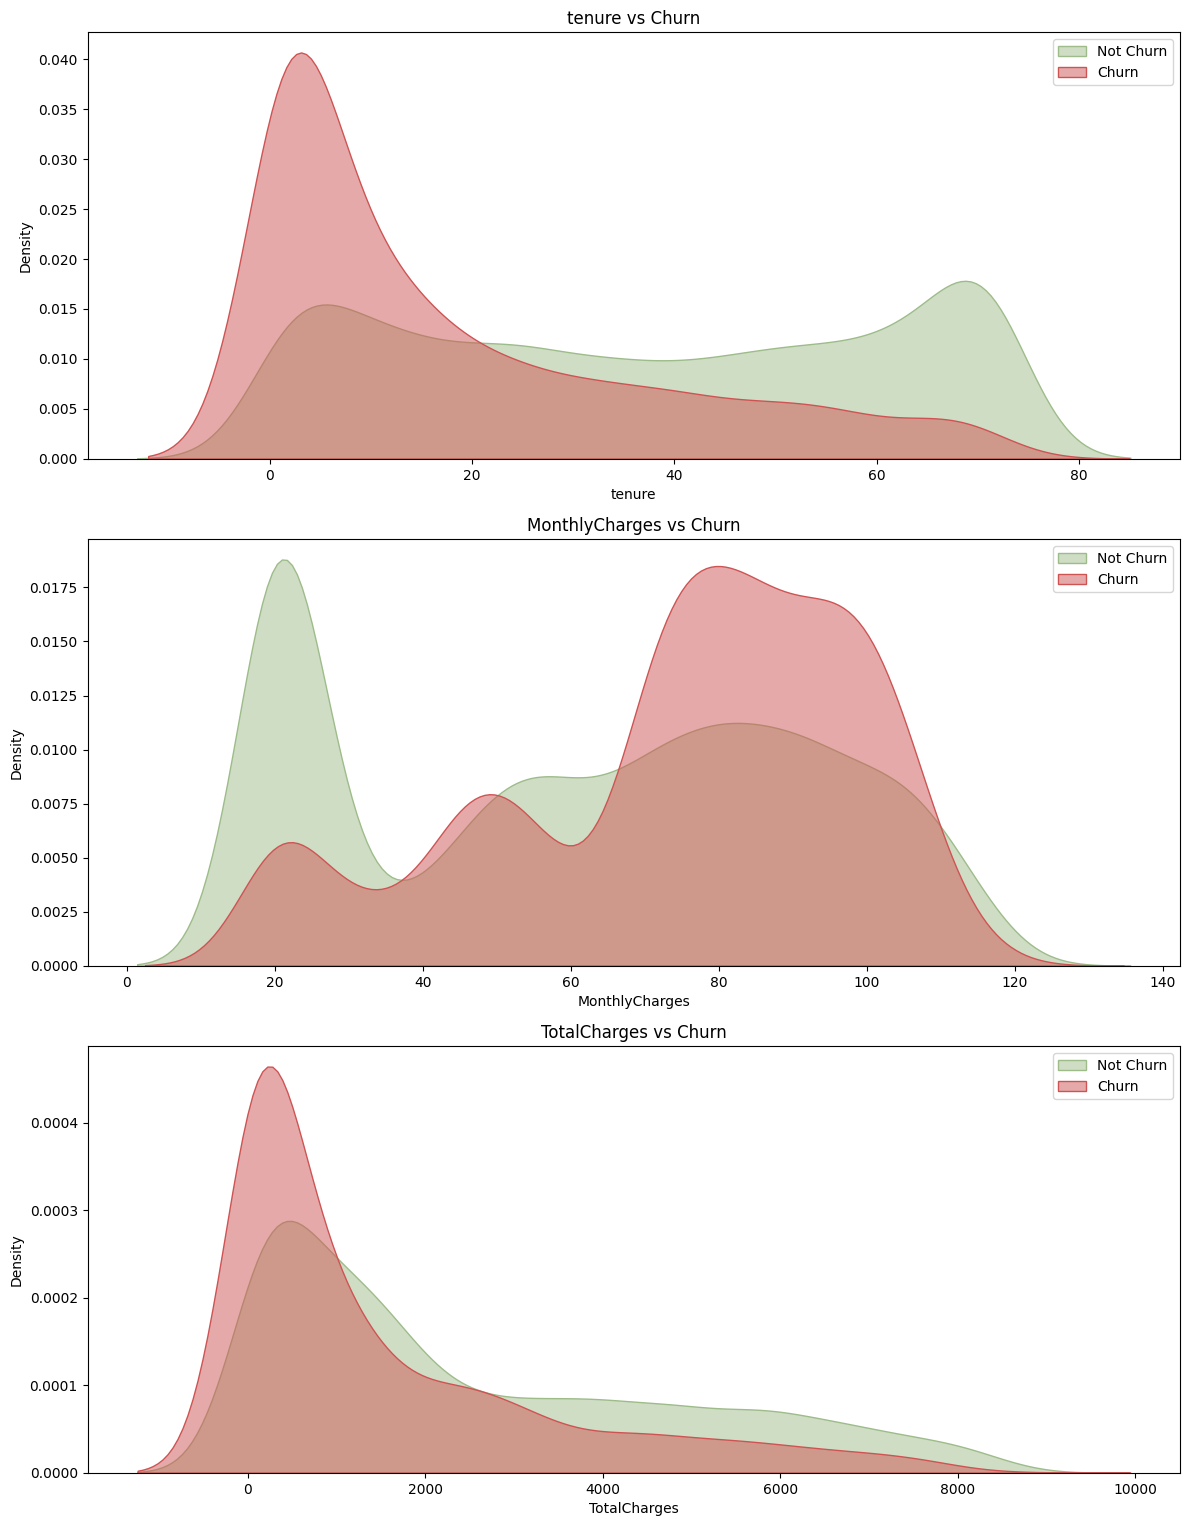

In [27]:
displot(df_cp, numerical_columns)

Observing the distributions:

1. Tenure: The distribution is bimodal, with many customers at the start (0–1 months) and at the maximum tenure (~72 months). This suggests a group of new customers and another group of long-term customers, which could be relevant for predicting churn.

2. MonthlyCharges: Most customers have monthly charges clustered around lower values, with a long tail toward higher charges. This right-skewed distribution indicates that a small number of customers pay significantly higher monthly fees.

3. TotalCharges: The distribution is heavily right-skewed, as expected, since it accumulates monthly charges over the tenure. Customers with short tenure contribute to the peak near zero, while long-term customers contribute to the long tail.

Overall, these distributions highlight potential preprocessing needs, such as normalization or log transformation, and suggest that tenure and charges may have different predictive powers for churn.

### 1.2.4 Business Context

- Class imbalance matters in churn prediction because the churn group is much smaller than the non-churn group, yet it is the most critical for business impact. If the model focuses only on the majority (non-churn), it will miss signals like risky month-to-month contracts, electronic check users, or customers lacking service add-ons—leading to lost revenue opportunities. Accurately identifying this minority group enables targeted retention strategies where they matter most.

👉 In one line: Without addressing class imbalance, the model risks overlooking the small but high-value group of customers most likely to leave.

# 1.3 Advanced Univariate Analysis

### 1.3.1 Numerical Features: Distribution analysis, outlier detection using IQR and Z-score methods

#### 1.3.1.1 Distribution and Outliers Detection Using Boxplot

In [28]:
def hist_boxplot(df, cols):
    fig, axes = plt.subplots(2, len(cols), figsize=(5 * len(cols), 8))

    for i, col in enumerate(cols):
        sns.histplot(
            data=df, x=col, ax=axes[0, i], kde=True, color='#9EBC8A'
        )
        axes[0, i].set_title(f'Histogram of {col}', color='#537D5D')
        
        sns.boxplot(
            data=df, x=col, ax=axes[1, i], color='#73946B'
        )
        axes[1, i].set_title(f'Boxplot of {col}', color='#537D5D')

    plt.tight_layout()
    plt.show()

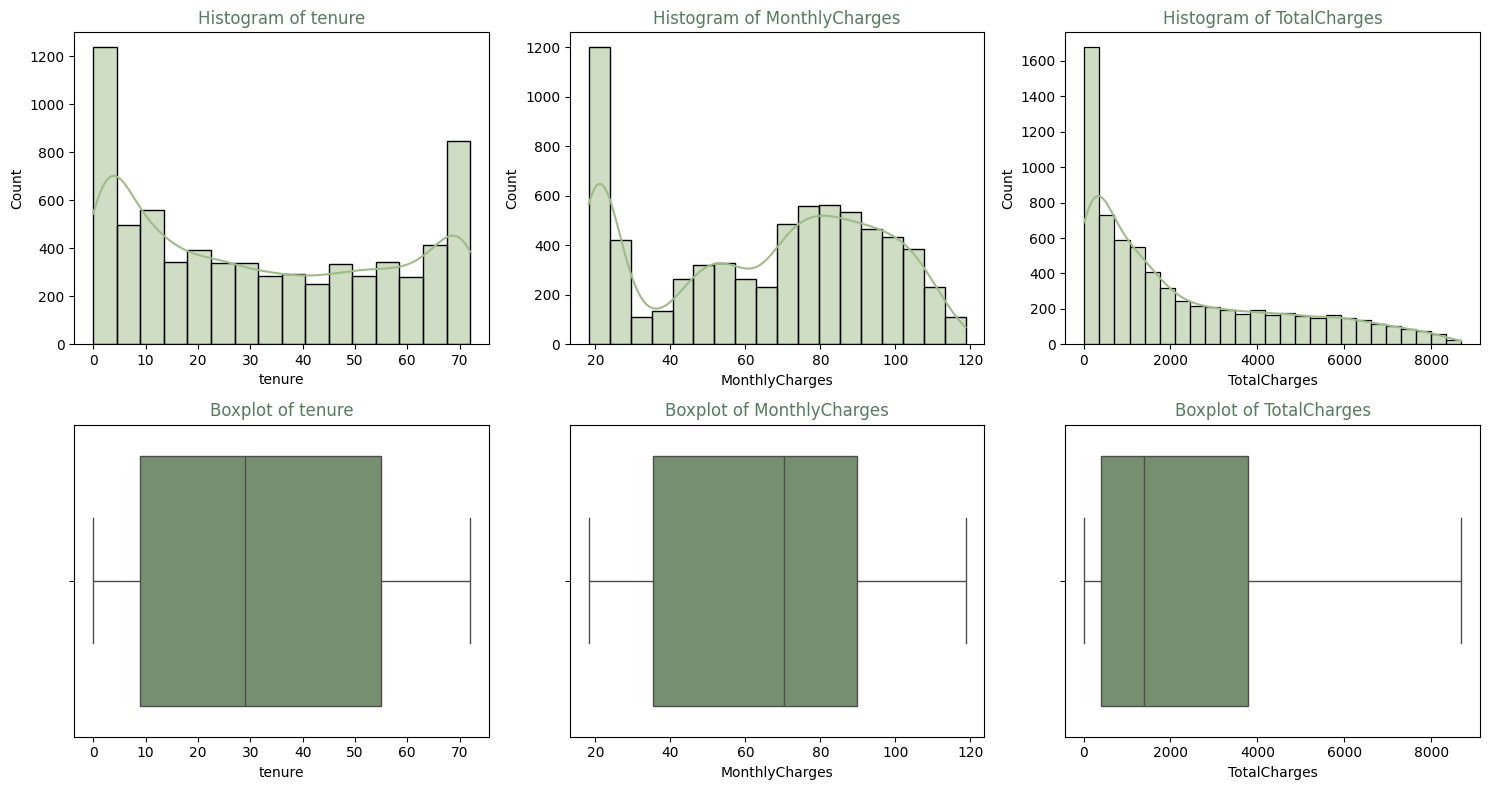

In [29]:
hist_boxplot(df_cp, numerical_columns)

from boxplot representation not represent any outliers representations. So for further analysis we can use Empirical Rules/3-Sigma Rule and the IQR method

#### 1.3.1.2 Outliers Detection Using Empirical Rules / 3-sigma Rule

In [30]:
def find_anomaly(data):
    
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std) 
    lower_bound = mean - (3 * std) 

    return (data > upper_bound) | (data < lower_bound)

In [31]:
for col in numerical_columns:
    n_outliers = find_anomaly(df_cp[col]).sum()
    n_outliers_percentage = round(n_outliers / len(df_cp), 3)
    print(f"{col} : {n_outliers} outliers ({n_outliers_percentage} %)")

tenure : 0 outliers (0.0 %)
MonthlyCharges : 0 outliers (0.0 %)
TotalCharges : 0 outliers (0.0 %)


from this also we can understand outlier are not exist in the dataset numerical columns, then we verify it again by using IQR method also

#### 1.3.1.3 Outliers Detection Using IQR Method

In [32]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR

    return (data > upper_bound) | (data < lower_bound)

for col in numerical_columns:
    n_outliers = find_anomaly(df_cp[col]).sum()
    n_outliers_percentage = round(n_outliers / len(df_cp), 3)
    print(f"{col} : {n_outliers} outliers ({n_outliers_percentage} %)")

tenure : 0 outliers (0.0 %)
MonthlyCharges : 0 outliers (0.0 %)
TotalCharges : 0 outliers (0.0 %)


We can understand, there are no more any outliers in our dataset's numerical columns, so then we can go to the Feature Bining part

#### 1.3.1.4 Outliers Detection Using Z-score methods 

In [33]:
def detect_outliers_zscore(df, columns, threshold=3):
    
    outliers_summary = {}
    
    for col in columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        
        outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
        outliers = df[col].iloc[outlier_indices]
        
        outliers_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100,
            'min_value': outliers.min() if len(outliers) > 0 else None,
            'max_value': outliers.max() if len(outliers) > 0 else None,
            'indices': outlier_indices
        }
        
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        
        if len(outliers) > 0:
            if outliers.min() < df[col].quantile(0.25):
                plt.axvspan(outliers.min(), df[col].quantile(0.01), alpha=0.3, color='red')
            if outliers.max() > df[col].quantile(0.75):
                plt.axvspan(df[col].quantile(0.99), outliers.max(), alpha=0.3, color='red')
        
        plt.subplot(1, 2, 2)
        sns.histplot(z_scores, kde=True)
        plt.axvline(x=threshold, color='r', linestyle='--', label=f'Threshold (+{threshold})')
        plt.axvline(x=-threshold, color='r', linestyle='--', label=f'Threshold (-{threshold})')
        plt.title(f'Z-scores of {col}')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
    return outliers_summary

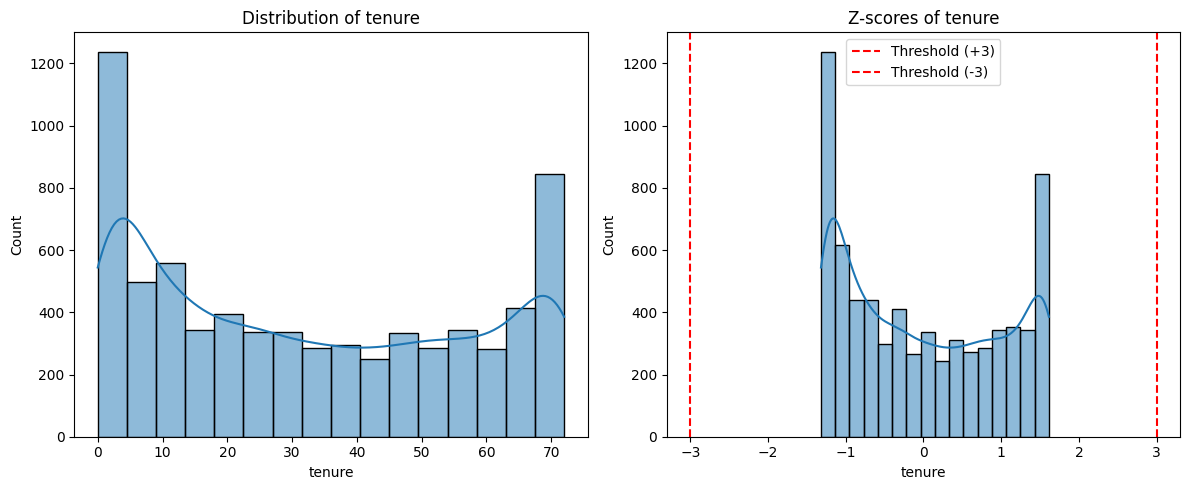

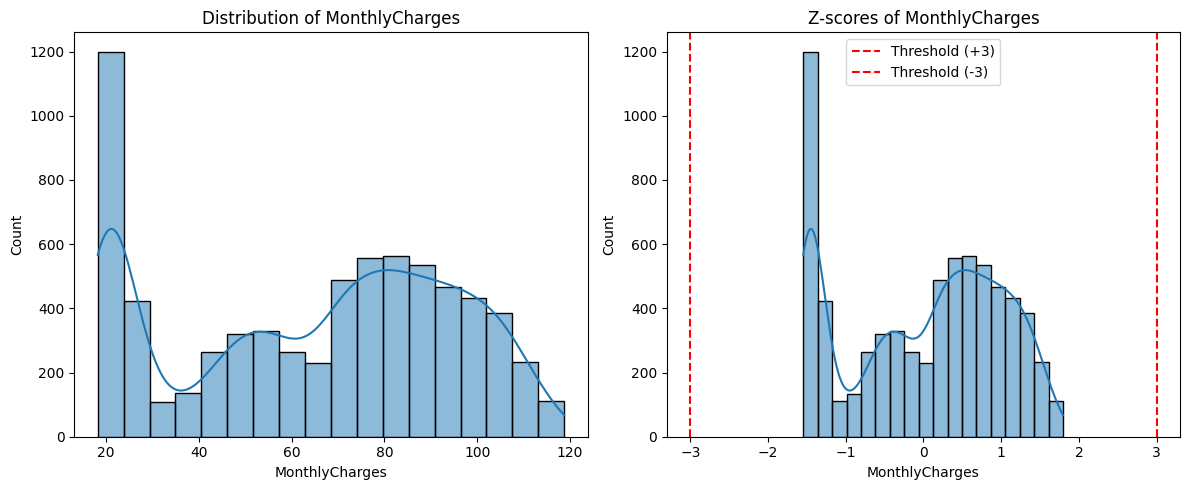

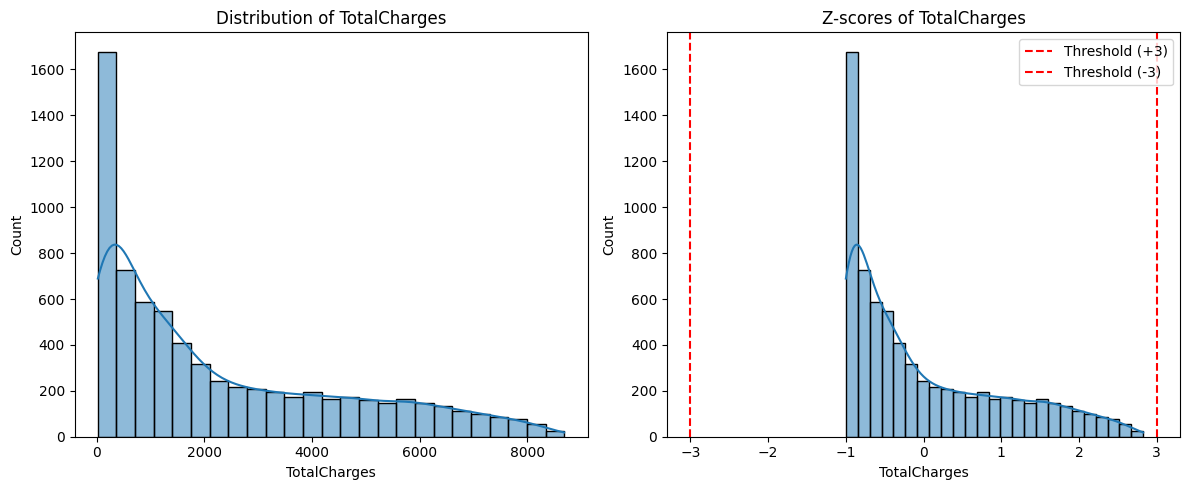

In [34]:
outliers_info = detect_outliers_zscore(df_cp, numerical_columns)

- Accordingly to the Z-core values all data points include in between threshold values. So, we can say that there are no any outliers exist.

### 1.3.2 Categorical Features: Frequency analysis and relationship with churn

#### 1.3.2.1 Frequency analysis

In [38]:
for col in categorical_columns:
    print(f"\nFrequency for {col}:")
    print(df_cp[col].value_counts())


Frequency for gender:
gender
Male      3555
Female    3488
Name: count, dtype: int64

Frequency for SeniorCitizen:
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

Frequency for Partner:
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Frequency for Dependents:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Frequency for PhoneService:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Frequency for MultipleLines:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Frequency for InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Frequency for OnlineSecurity:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Frequency for OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
N

#### 1.3.2.2 Features relationship with churn 

In [35]:
def barchart_bivariate(df, features, feature1='Churn'):
    colors = {'Yes': '#ce5454', 'No': '#9EBC8A'}
    
    ncols = 2
    nrows = int(np.ceil(len(features) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
    axes = axes.flatten()

    for i, feature2 in enumerate(features):
        ax = axes[i]
        
        data = df.groupby([feature2, feature1]).size().reset_index(name='count')

        sns.barplot(
            data=data,
            x=feature2,
            y='count',
            hue=feature1,
            palette=colors,
            ax=ax
        )

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(
                f"{int(height)}",
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom',
                xytext=(0, 6),  
                textcoords='offset points',
                color='black', fontsize=11
            )

        ax.set_title(f'{feature2} vs {feature1}')
        ax.set_xlabel(feature2)
        ax.set_ylabel('Number of Customers')
        ax.set_ylim(0, max(data['count']) * 1.15)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

        ax.legend(title=feature1, bbox_to_anchor=(1.05, 1), loc='upper left')

    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1860537994.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1860537994.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1860537994.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1860537994.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

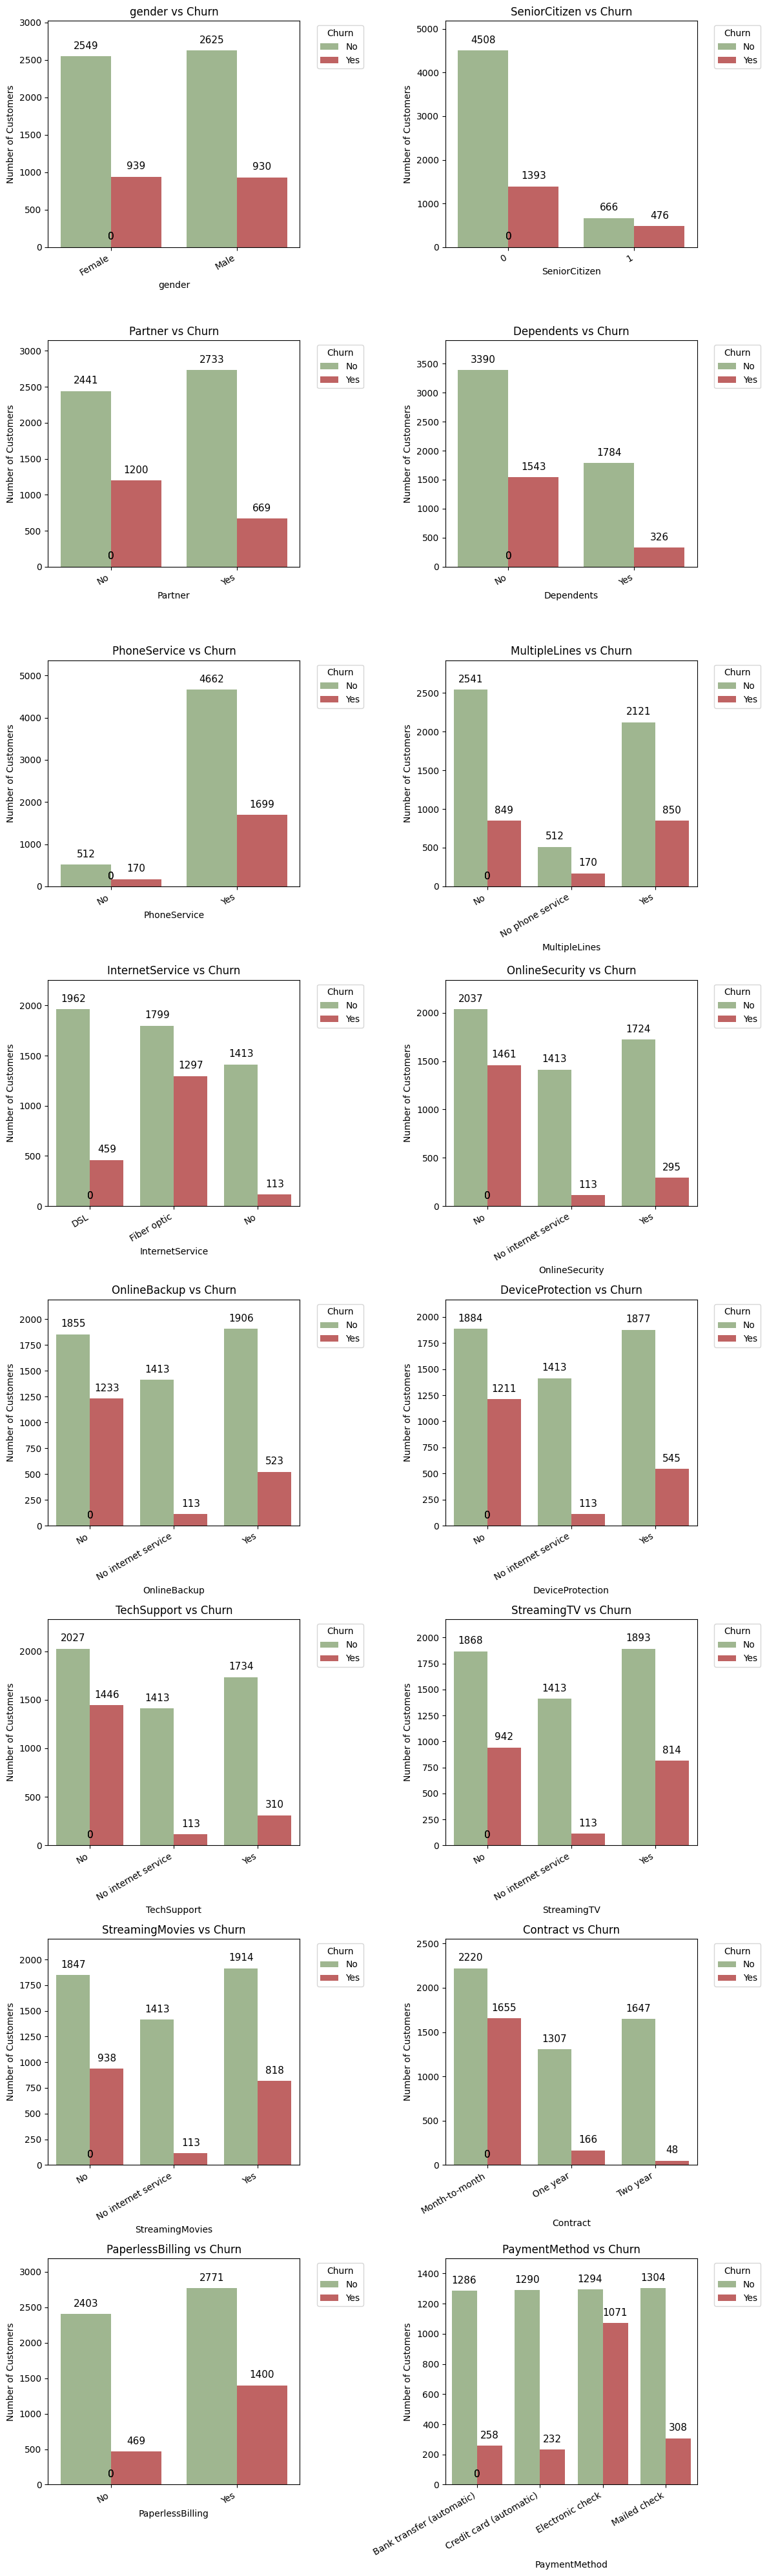

In [36]:
barchart_bivariate(df_cp, categorical_columns)

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\2761735345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_cp, palette={'Yes': '#ce5454', 'No': '#9EBC8A'})
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\2761735345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_cp, palette={'Yes': '#ce5454', 'No': '#9EBC8A'})
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\2761735345.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df_cp, palette={'Yes': '#ce54

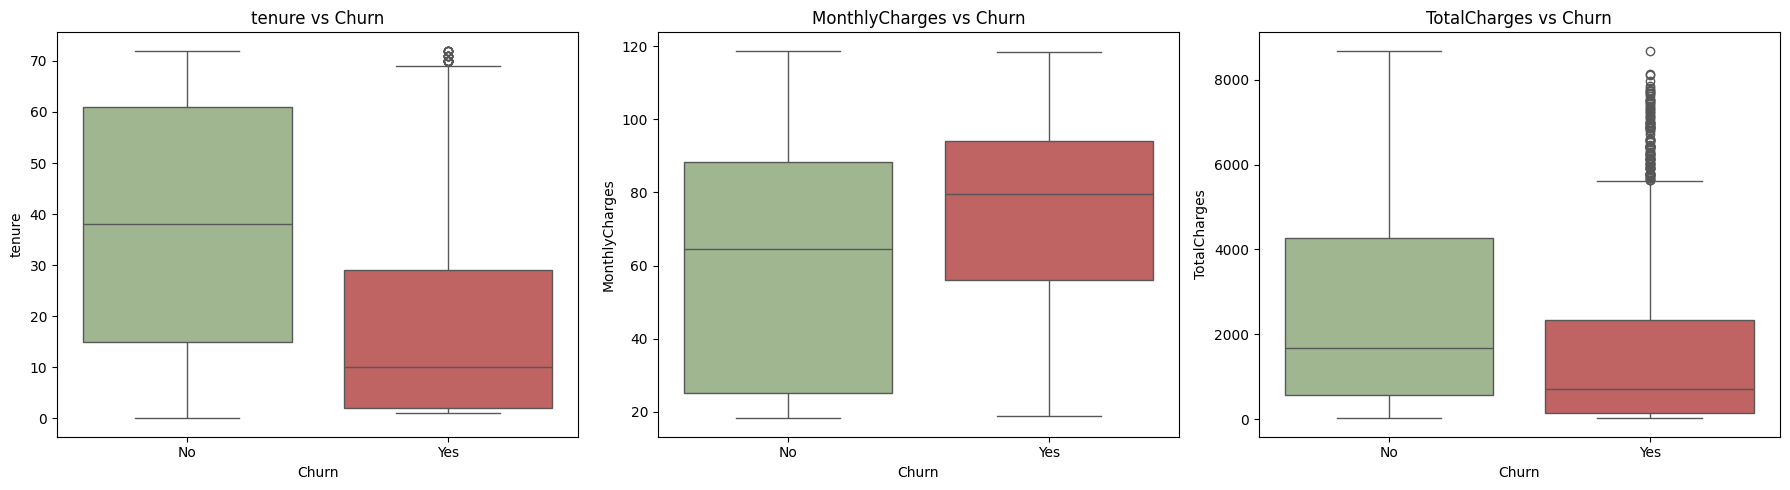

In [37]:
plt.figure(figsize=(18, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df_cp, palette={'Yes': '#ce5454', 'No': '#9EBC8A'})
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Feature Engineering Opportunities

1. **Tenure Binning**  
   - Create tenure segments (e.g., New, Developing, Established, Loyal) to capture non-linear effects of customer age.

2. **Service Count**  
   - Count the number of services a customer subscribes to (e.g., sum of 'Yes' in service columns) to create a `service_count` feature.

3. **Total Services Tier**  
   - Bin `service_count` into tiers (e.g., Basic, Standard, Premium).

4. **Monthly Charges Binning**  
   - Bin `MonthlyCharges` into categories (e.g., Low, Medium, High).

5. **Interaction Features**  
   - Combine features such as `Contract` and `PaymentMethod` to capture interaction effects (e.g., "Month-to-month + Electronic check").

6. **Average Charges per Month**  
   - Create a feature: `AvgChargesPerMonth = TotalCharges / (tenure + 1)`.

7. **Long-Term No Add-ons**  
   - Flag customers with long tenure but no add-on services (e.g., no OnlineSecurity, TechSupport, etc.).

8. **Is Senior with Dependents**  
   - Create a binary feature for senior citizens who have dependents.

9. **Paperless & Electronic Check**  
   - Create a binary feature for customers with both paperless billing and electronic check payment.

10. **Recent Joiner**  
    - Flag customers with tenure less than 6 months.

Above feature engineering opportunities can be add to out model building process, but in here I'm not using those, these are for understanding purpose only!

## 1.4  Comprehensive Bivariate Analysis

#### 1.4.1 Churn vs Demographics: Age groups, gender, family status impact 

In [44]:
def barchart_stacked(df, features, feature1='Churn'):
    colors = {'Yes': '#ce5454', 'No': '#9EBC8A'}

    ncols = 2
    nrows = int(np.ceil(len(features) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
    axes = axes.flatten()

    for i, feature2 in enumerate(features):
        ax = axes[i]

        data = df.groupby([feature2, feature1]).size().reset_index(name='count')
        pivot_data = data.pivot(index=feature2, columns=feature1, values='count').fillna(0)

        bottom_vals = np.zeros(len(pivot_data))
        for churn_status in colors.keys():
            ax.bar(
                pivot_data.index,
                pivot_data[churn_status],
                bottom=bottom_vals,
                color=colors[churn_status],
                label=churn_status
            )
            for idx, val in enumerate(pivot_data[churn_status]):
                if val > 0:
                    ax.text(
                        idx, 
                        bottom_vals[idx] + val/2,
                        f"{int(val)}",
                        ha='center', va='center',
                        color='white', fontsize=10
                    )
            bottom_vals += pivot_data[churn_status]

        for idx, total in enumerate(bottom_vals):
            ax.text(
                idx,
                total + (max(bottom_vals) * 0.02),
                f"{int(total)}",
                ha='center', va='bottom',
                fontsize=10
            )

        ax.set_title(f'{feature2} vs {feature1}')
        ax.set_xlabel(feature2)
        ax.set_ylabel('Number of Customers')
        ax.set_ylim(0, max(bottom_vals) * 1.15)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

        ax.legend(title=feature1, bbox_to_anchor=(1.05, 1), loc='upper left')

    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom_vals[idx] + val/2,
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:28: FutureWarning: Series.__getitem__ treating keys as positions is depr

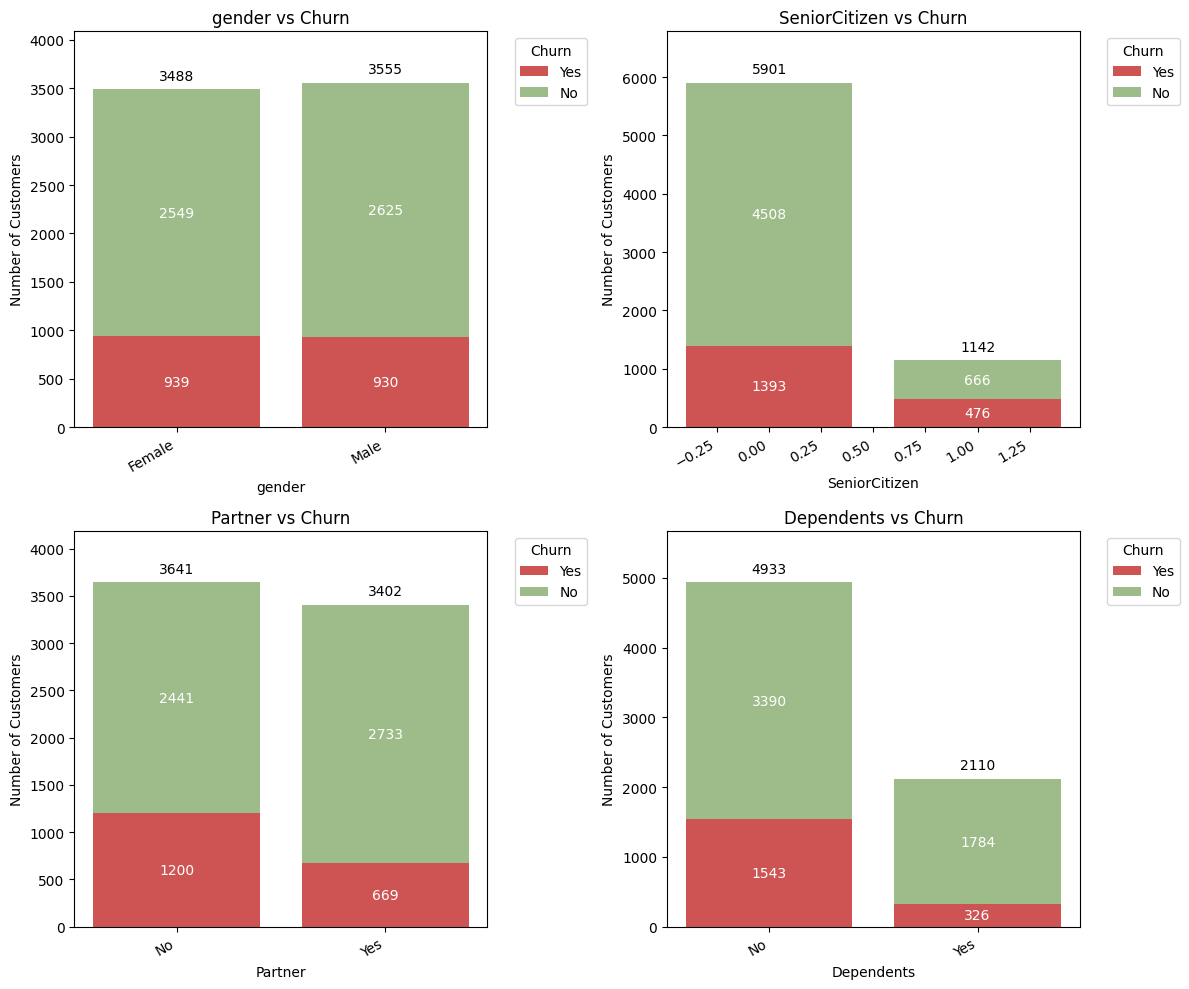

In [45]:
barchart_stacked(df_cp, demographic_features)

#### 1.4.2 Churn vs Services: Service adoption patterns and churn correlation  

In [53]:
tenure_bins = [0, 6, 24, 48, np.inf]
tenure_labels = ['0-6', '7-24', '25-48', '49+']

monthly_bins = [0, 35, 70, 105, 140, np.inf]
monthly_labels = ['0-35', '36-70', '71-105', '106-140', '141+']

total_bins = [0, 1000, 3000, 5000, 7000, np.inf]
total_labels = ['0-1k', '1k-3k', '3k-5k', '5k-7k', '7k+']

df_bin = df_cp.copy()
df_bin['tenure'] = pd.cut(df_bin['tenure'], bins=tenure_bins, labels=tenure_labels, include_lowest=True, right=False)
df_bin['MonthlyCharges'] = pd.cut(df_bin['MonthlyCharges'], bins=monthly_bins, labels=monthly_labels, include_lowest=True, right=False)
df_bin['TotalCharges'] = pd.cut(df_bin['TotalCharges'], bins=total_bins, labels=total_labels, include_lowest=True, right=False)

df_bin.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0-6,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0-35,0-1k,No
1,Male,0,No,No,25-48,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,36-70,1k-3k,No
2,Male,0,No,No,0-6,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,36-70,0-1k,Yes
3,Male,0,No,No,25-48,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),36-70,1k-3k,No
4,Female,0,No,No,0-6,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,71-105,0-1k,Yes


C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([feature2, feature1]).size().reset_index(name='count')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom_vals[idx] + val/2,
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppDat

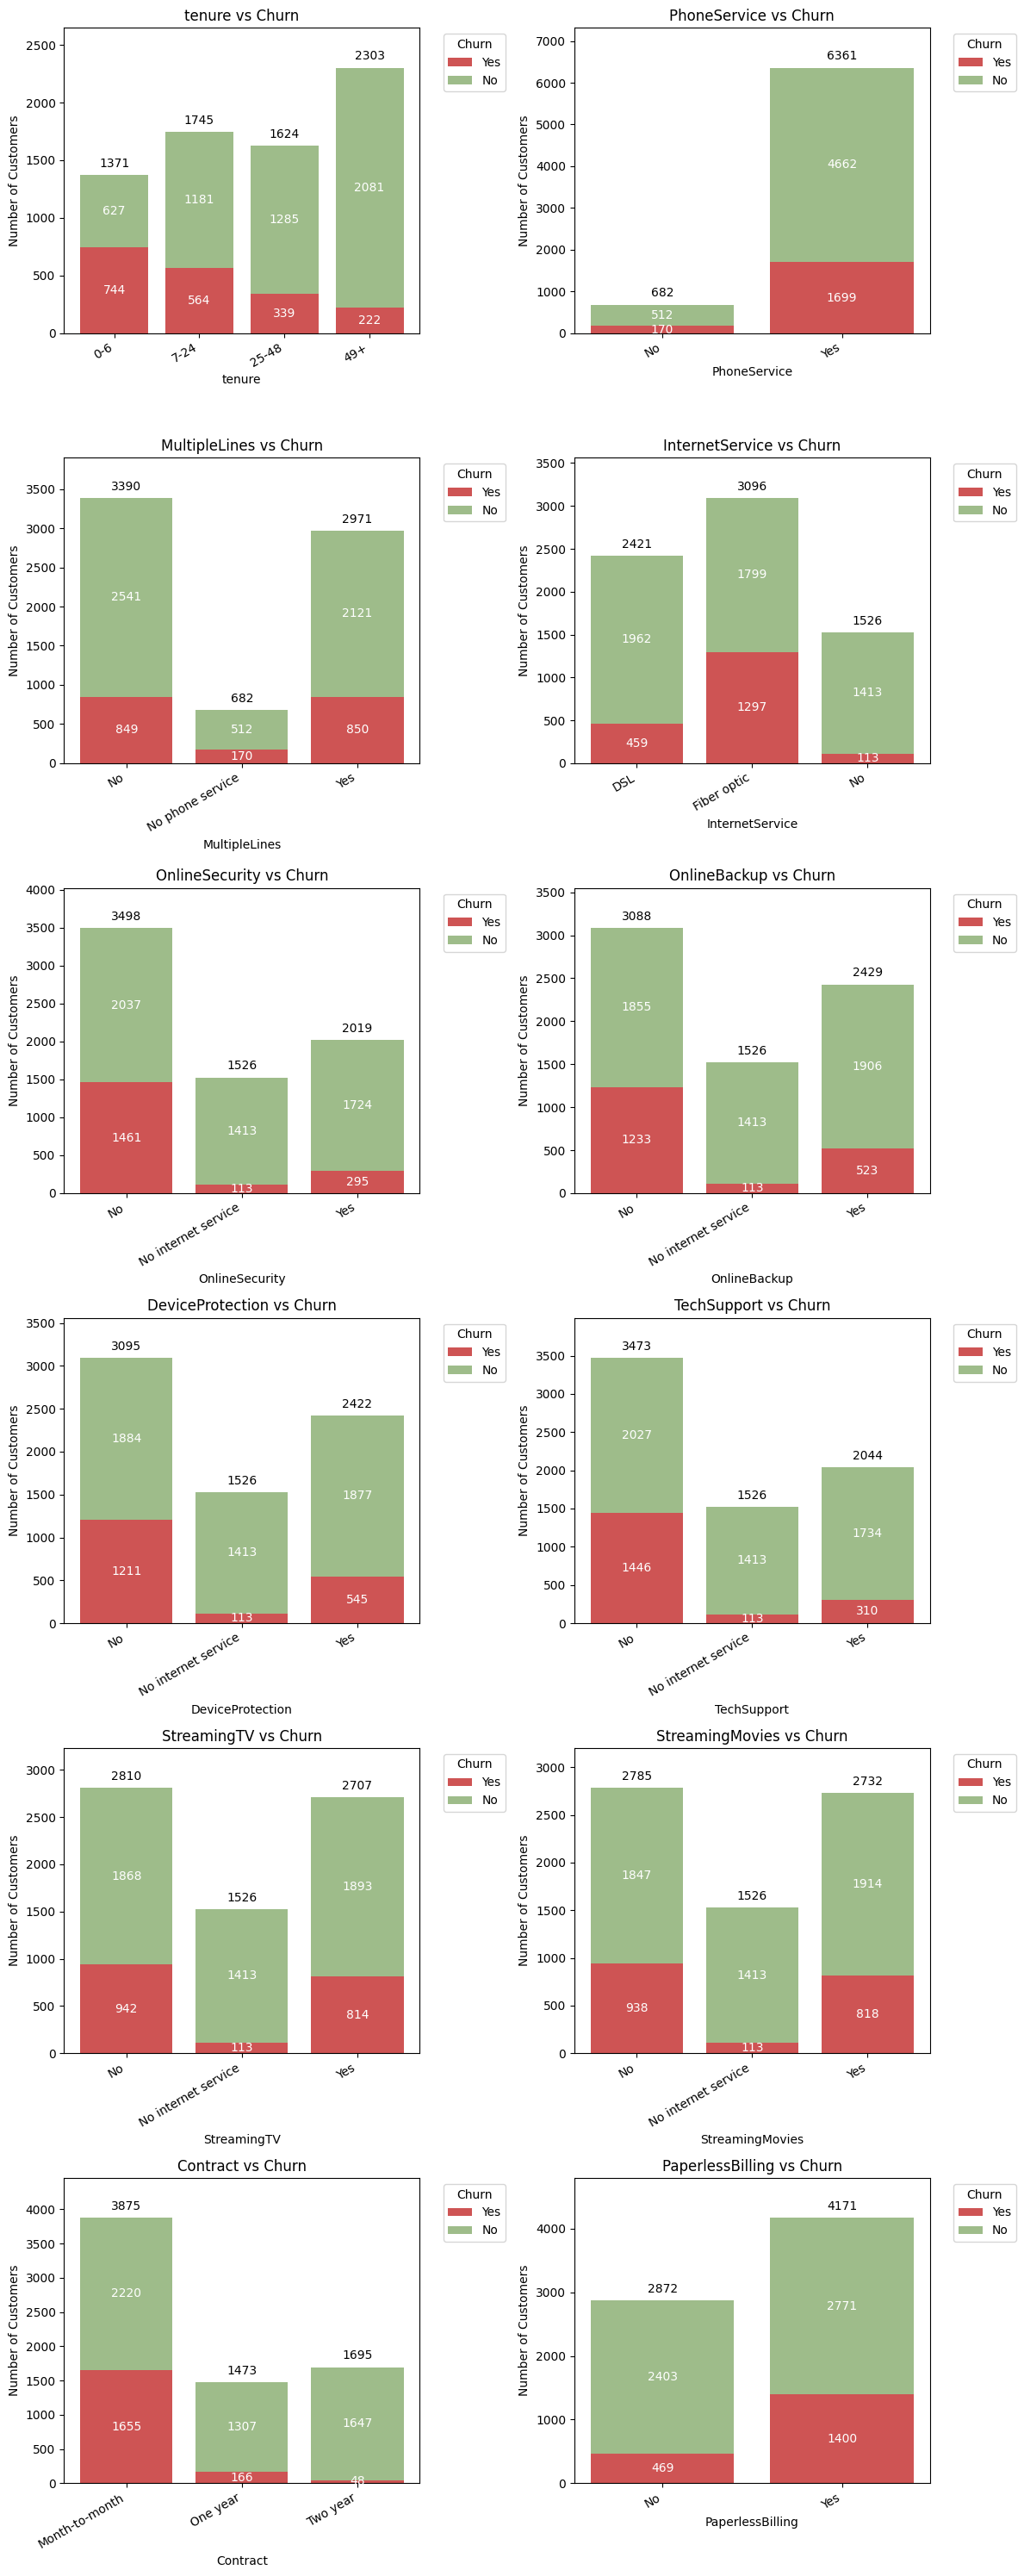

In [54]:
barchart_stacked(df_bin, behavioral_features)

#### 1.4.3 Churn vs Financial: Monthly charges, total charges, and payment behavior  

C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom_vals[idx] + val/2,
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
C:\Users\Hasitha\AppData\Local\Temp\ipykernel_12052\1538962108.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby([feature2, feature1]).size().reset_index(name='count')
C:\Users\Hasitha\AppDat

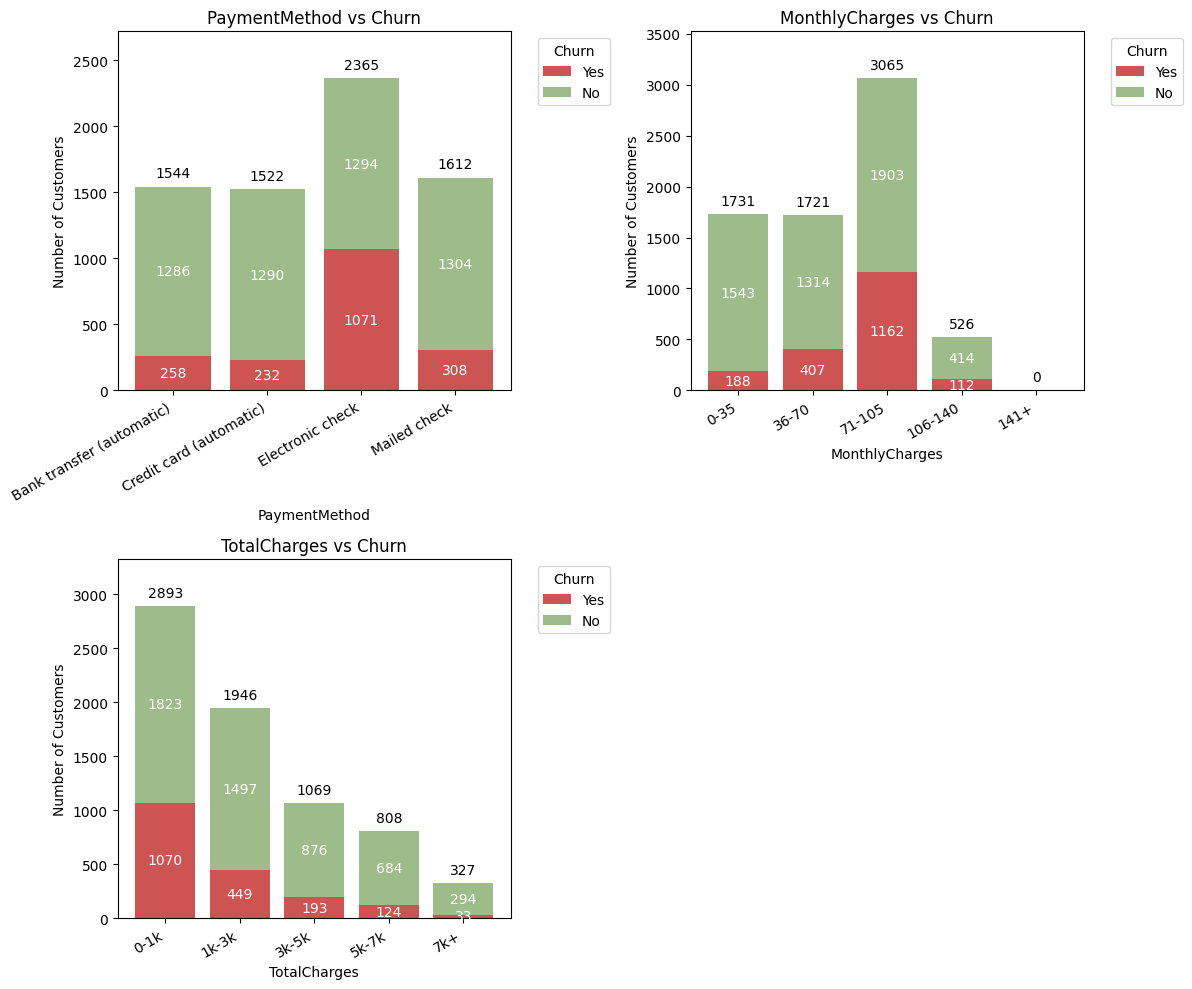

In [55]:
barchart_stacked(df_bin, financial_features)

#### 1.4.4 Statistical Significance: Use appropriate tests (Chi-square, t-tests) to validate relationships  

#### 1.4.4.1 Chi-square test for categorical variables

In [56]:
from scipy.stats import chi2_contingency

print("Chi-square test results for categorical variables vs Churn:\n")
for col in categorical_columns:
    if col == 'Churn':
        continue
    contingency_table = pd.crosstab(df_cp[col], df_cp['Churn'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")

Chi-square test results for categorical variables vs Churn:

gender: p-value = 0.4866 (Not significant)
SeniorCitizen: p-value = 0.0000 (Significant)
Partner: p-value = 0.0000 (Significant)
Dependents: p-value = 0.0000 (Significant)
PhoneService: p-value = 0.3388 (Not significant)
MultipleLines: p-value = 0.0035 (Significant)
InternetService: p-value = 0.0000 (Significant)
OnlineSecurity: p-value = 0.0000 (Significant)
OnlineBackup: p-value = 0.0000 (Significant)
DeviceProtection: p-value = 0.0000 (Significant)
TechSupport: p-value = 0.0000 (Significant)
StreamingTV: p-value = 0.0000 (Significant)
StreamingMovies: p-value = 0.0000 (Significant)
Contract: p-value = 0.0000 (Significant)
PaperlessBilling: p-value = 0.0000 (Significant)
PaymentMethod: p-value = 0.0000 (Significant)


- Gender (p = 0.4866): There is no statistically significant relationship between gender and churn
- PhoneService (p = 0.3388): Also not significantly related to churn

- when keeping  these features: 
    - May have interaction effects with other variables
    - Could be useful in some ensemble models
    - Prevents potential information loss

will see model performance and accordingly to this i'll decide remove or keep them (Researching Purpose currently i keep these features)

#### 1.4.4.2 t-tests for numerical variables

In [62]:
from scipy.stats import ttest_ind

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print("\nT-test results for numerical variables vs Churn:\n")

for col in numerical_cols:
    group0 = df_cp[df_cp['Churn'] == 'No'][col]
    group1 = df_cp[df_cp['Churn'] == 'Yes'][col]
    
    t_stat, p = ttest_ind(group0, group1, equal_var=False)
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else '(Not significant)'}")


T-test results for numerical variables vs Churn:

tenure: p-value = 0.0000 (Significant)
MonthlyCharges: p-value = 0.0000 (Significant)
TotalCharges: p-value = 0.0000 (Significant)


## 1.5  Multivariate Analysis

#### 1.5.1 Correlation Matrix: Identify multicollinearity issues

In [63]:
df_cleaned = df_cp.copy()

bin_cols = ["gender","Partner","Dependents","PhoneService","PaperlessBilling","Churn"]
for col in bin_cols:
    df_cleaned[col]=df_cleaned[col].map({"Yes":1, "No":0, "Male":1, "Female":0})

multi_cols= ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_cleaned = pd.get_dummies(df_cleaned, columns = multi_cols, drop_first= True)

In [64]:
for col in df_cleaned.select_dtypes(include=["bool"]).columns:
    df_cleaned[col]= df_cleaned[col].astype(int)

df_cleaned

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,1,0,1,0,1,1,0,0,0,1
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,0,0,0,0,0,0,0,0,0,1


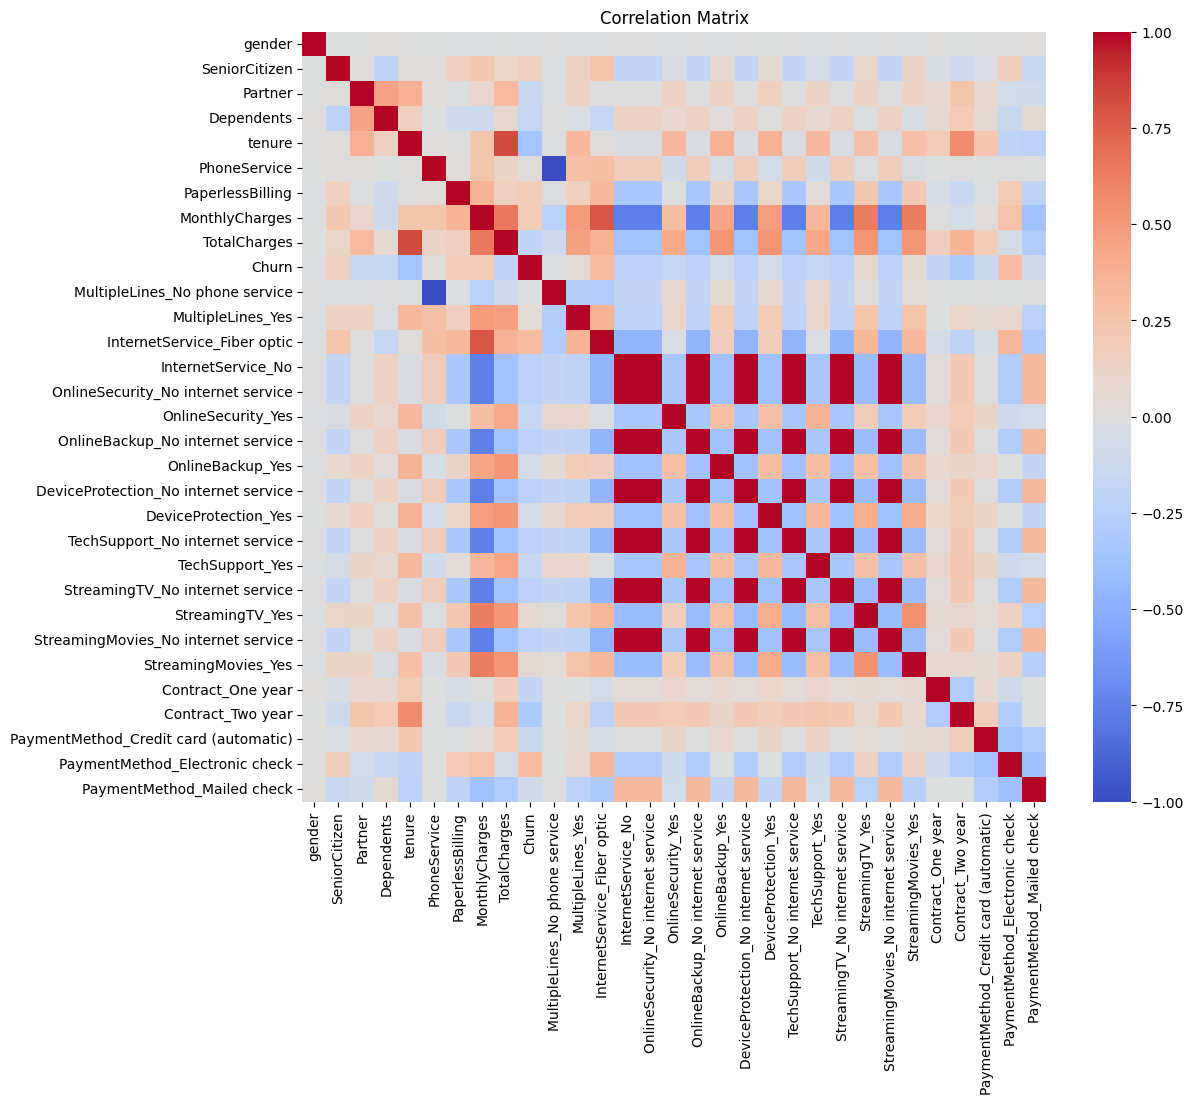

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


In [67]:
plt.figure(figsize=(12,10))
corr = df_cleaned.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

corr_churn = corr['Churn'].sort_values(ascending=False)
print(corr_churn)

- Key Multicollinearity Issues :
    - Highly Correlated Dummy Variables:
        - Features like **InternetService_No**, **StreamingTV_No internet service**, **OnlineSecurity_No internet service**, and similar "**No internet service**" dummies all have exactly the same negative correlation with churn (-0.227890). This suggests they are perfectly collinear (i.e., if one is 1, the others are also 1 for the same row).
        - Similarly, **Contract_One year** and **Contract_Two year** are negatively correlated with churn, and are mutually exclusive with **Contract_Month-to-month** (which is dropped due to **drop_first=True** in **pd.get_dummies**). These contract dummies are also collinear.

    - PaymentMethod Dummies:
        - **PaymentMethod_Electronic check**, **PaymentMethod_Mailed check**, and **PaymentMethod_Credit card (automatic)** are all dummies for the same categorical variable, so they are also collinear.

    - StreamingTV/StreamingMovies/OnlineSecurity/TechSupport/DeviceProtection/OnlineBackup:
        - These features have both "Yes", "No", and "No internet service" dummies, which are mutually exclusive and thus collinear.

#### 1.5.2 Feature Interactions: Explore combinations that influence churn (e.g., Contract + PaymentMethod)

Analyzing Contract and InternetService interaction...


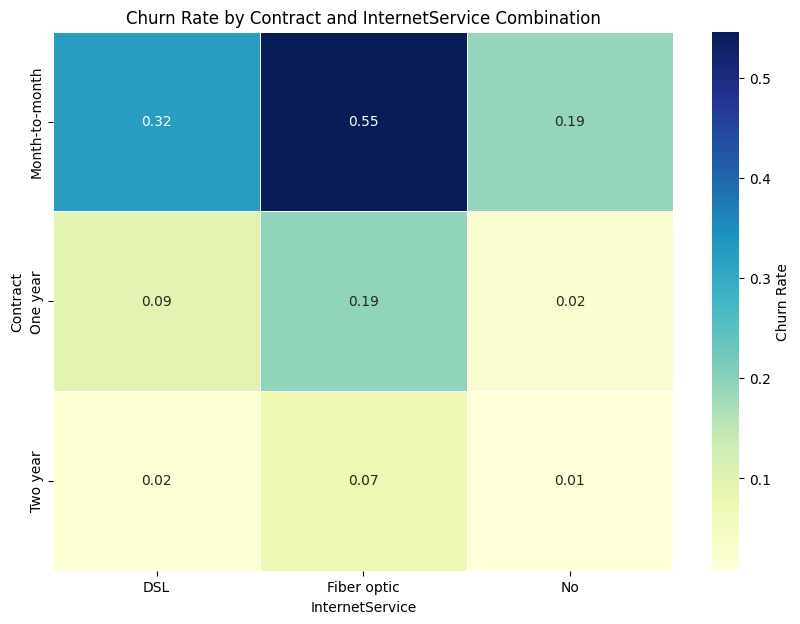


Analyzing PaymentMethod and PaperlessBilling interaction...


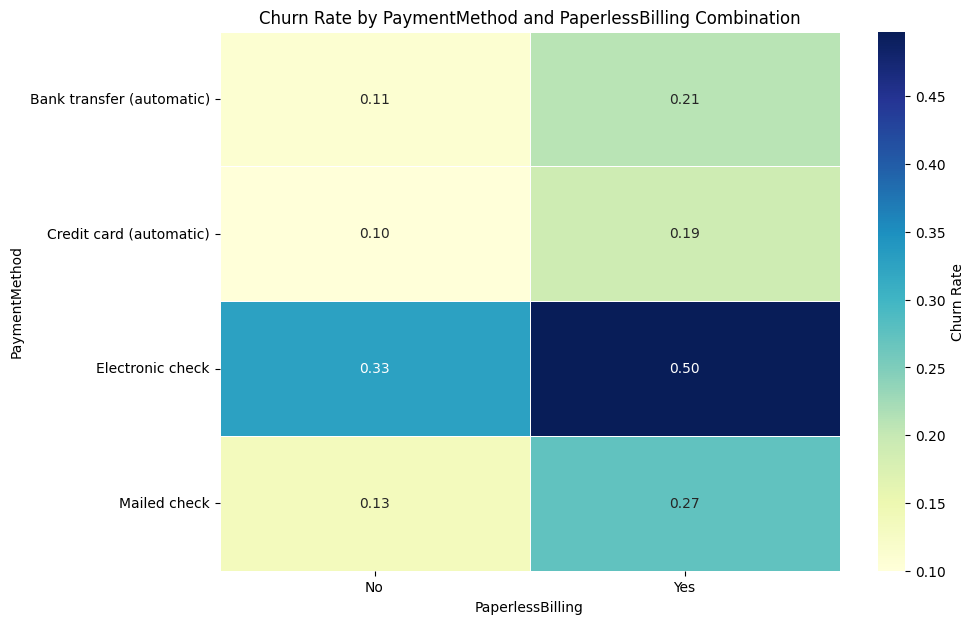


Analyzing SeniorCitizen and Dependents interaction...


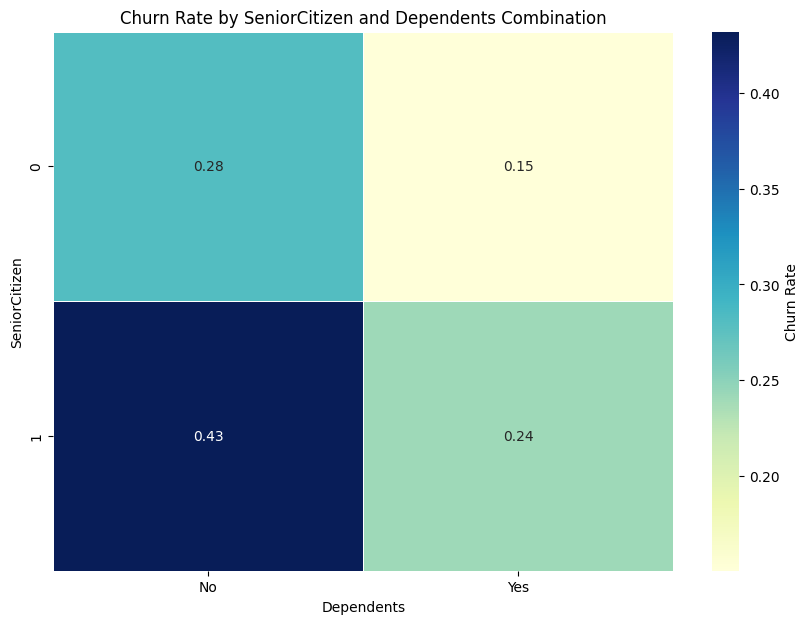


Analyzing Contract and PaymentMethod interaction...


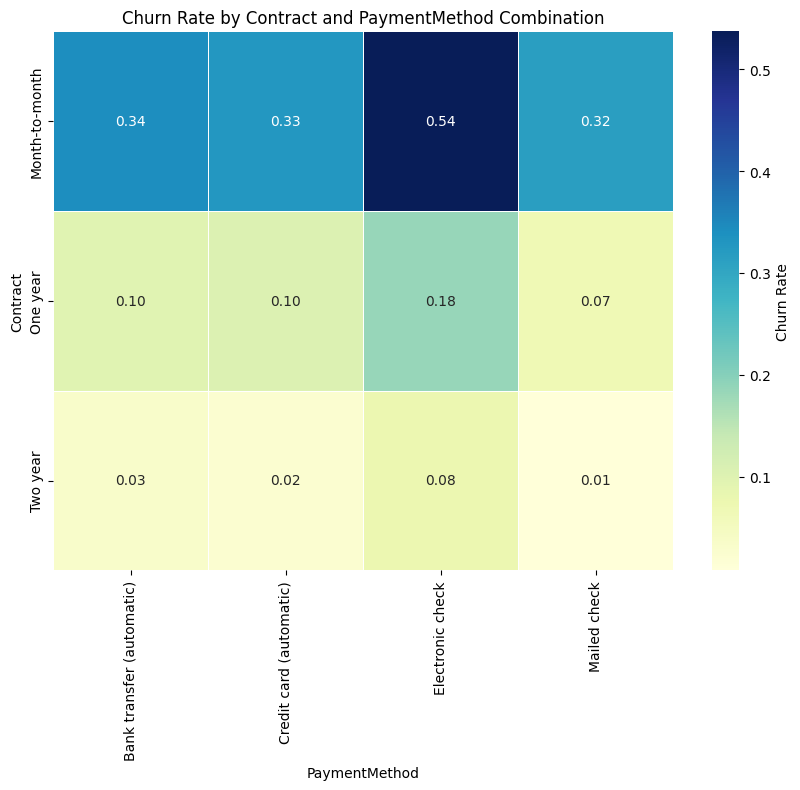

In [71]:
def plot_cat_interaction_churn(df, feature1, feature2, target='Churn'):
    churn_rate_pivot = df.pivot_table(
        values=target,
        index=feature1,
        columns=feature2,
        aggfunc='mean'
    )

    plt.figure(figsize=(10, 7))
    sns.heatmap(churn_rate_pivot, annot=True, fmt=".2f", cmap="YlGnBu",
                linewidths=.5, cbar_kws={'label': 'Churn Rate'})
    plt.title(f'Churn Rate by {feature1} and {feature2} Combination')
    plt.show()

df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

print("Analyzing Contract and InternetService interaction...")
plot_cat_interaction_churn(df, 'Contract', 'InternetService')

print("\nAnalyzing PaymentMethod and PaperlessBilling interaction...")
plot_cat_interaction_churn(df, 'PaymentMethod', 'PaperlessBilling')

print("\nAnalyzing SeniorCitizen and Dependents interaction...")
plot_cat_interaction_churn(df, 'SeniorCitizen', 'Dependents')

print("\nAnalyzing Contract and PaymentMethod interaction...")
plot_cat_interaction_churn(df, 'Contract', 'PaymentMethod')

#### 1.5.3 Customer Segmentation: Group customers by behavior patterns

Segment
1    2740
3    2095
2    1526
0     682
Name: count, dtype: int64


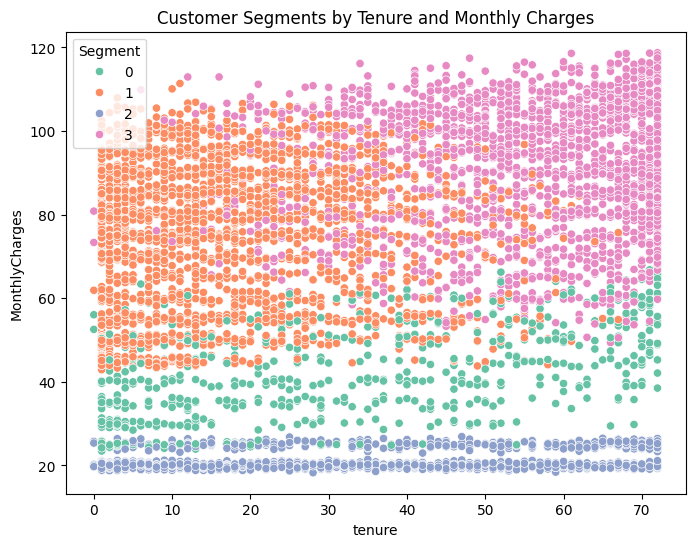

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

segment_features = [
    'tenure', 'MonthlyCharges', 'TotalCharges',
    'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

df_seg = pd.get_dummies(df_cp[segment_features], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_seg)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_cp['Segment'] = kmeans.fit_predict(X_scaled)

print(df_cp['Segment'].value_counts())

plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Segment', data=df_cp, palette='Set2')
plt.title('Customer Segments by Tenure and Monthly Charges')
plt.show()

In [74]:
# 1. Only financial features
fin_features = ['MonthlyCharges', 'TotalCharges', 'PaymentMethod']
df_fin = pd.get_dummies(df_cp[fin_features], drop_first=True)
X_fin = StandardScaler().fit_transform(df_fin)
df_cp['Segment_fin'] = KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(X_fin)

# 2. Only service usage features
service_features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df_service = pd.get_dummies(df_cp[service_features], drop_first=True)
X_service = StandardScaler().fit_transform(df_service)
df_cp['Segment_service'] = KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(X_service)

# 3. Tenure + Contract + PaperlessBilling
combo1 = ['tenure', 'Contract', 'PaperlessBilling']
df_combo1 = pd.get_dummies(df_cp[combo1], drop_first=True)
X_combo1 = StandardScaler().fit_transform(df_combo1)
df_cp['Segment_combo1'] = KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(X_combo1)

# 4. Demographics + MonthlyCharges
combo2 = ['SeniorCitizen', 'Partner', 'Dependents', 'gender', 'MonthlyCharges']
df_combo2 = pd.get_dummies(df_cp[combo2], drop_first=True)
X_combo2 = StandardScaler().fit_transform(df_combo2)
df_cp['Segment_combo2'] = KMeans(n_clusters=4, random_state=42, n_init=10).fit_predict(X_combo2)

# Show segment counts for each combination
print("Financial segments:\n", df_cp['Segment_fin'].value_counts())
print("Service segments:\n", df_cp['Segment_service'].value_counts())
print("Tenure/Contract segments:\n", df_cp['Segment_combo1'].value_counts())
print("Demographic/MonthlyCharges segments:\n", df_cp['Segment_combo2'].value_counts())

Financial segments:
 Segment_fin
3    2365
2    1579
1    1577
0    1522
Name: count, dtype: int64
Service segments:
 Segment_service
1    2449
3    2386
2    1526
0     682
Name: count, dtype: int64
Tenure/Contract segments:
 Segment_combo1
1    2590
0    1675
3    1473
2    1305
Name: count, dtype: int64
Demographic/MonthlyCharges segments:
 Segment_combo2
0    2019
1    1948
3    1934
2    1142
Name: count, dtype: int64


## 1.6 Business Insights Generation

#### 1.6.1 High-Risk Customer Profiles: Identify characteristics of customers most likely to churn 

High-Risk Customer Characteristics : 
1. Contract Type
    - **Month-to-month** contract customers have the highest churn rate (42.7%).
    - Customers with **one-year** or **two-year** contracts are much less likely to churn.

2. Payment Method
    - Customers paying by **Electronic check** are much more likely to churn (45.3% churn rate).

3. Internet Service
    - **Fiber optic** users are at higher risk (41.9% churn rate).
    - Customers with **DSL** or **No Internet Service** churn less.

4. Service Add-ons
    - Customers **without OnlineSecurity**, **TechSupport**, or **DeviceProtection** have much higher churn rates (all above 39%).
    - Customers with these add-ons are more likely to stay.

5. Paperless Billing
    - Customers with **PaperlessBilling = Yes** are more likely to churn (33.6%).

6. Tenure
    - **New customers** (tenure 0–6 months) are at highest risk (53.3% churn rate).
    - Longer-tenure customers are less likely to churn.

7. Monthly Charges

    - Customers with **higher MonthlyCharges** (especially $70–$105) are more likely to churn (37.8%).

8. Demographics
    - **Senior citizens** (SeniorCitizen = 1) have a higher churn rate (41.7%).
    - Customers **without partners** or **dependents** are more likely to churn.

EX: 
A high-risk customer is likely to have the following attributes:

- **Contract**: Month-to-month
- **PaymentMethod**: Electronic check
- **InternetService**: Fiber optic
- **No add-on services**: No OnlineSecurity, TechSupport, or DeviceProtection
- **PaperlessBilling**: Yes
- **Tenure**: Less than 6 months
- **MonthlyCharges**: $70–$105
- **Demographics**: Senior citizen, no partner, no dependents

#### 1.6.2 Retention Opportunities: Services or contract types that reduce churn 

### Retention Opportunities: Services or Contract Types That Reduce Churn

Based on the analysis, the following services and contract types are associated with **lower churn rates** and represent key retention opportunities:

---

#### 1. **Long-Term Contracts**
- **One-year** and **Two-year** contracts have much lower churn rates compared to month-to-month contracts.
- **Action:** Encourage customers to switch from month-to-month to longer-term contracts through incentives or discounts.

#### 2. **Value-Added Service Add-ons**
- Customers **with** the following add-ons are less likely to churn:
  - **OnlineSecurity**
  - **TechSupport**
  - **DeviceProtection**
  - **OnlineBackup**
- **Action:** Promote and bundle these add-ons, especially to new or high-risk customers.

#### 3. **Non-Electronic Payment Methods**
- Customers paying by **Credit Card (automatic)**, **Bank Transfer (automatic)**, or **Mailed Check** have lower churn rates than those using **Electronic Check**.
- **Action:** Offer incentives for switching to automatic or non-electronic payment methods.

#### 4. **Paper Billing**
- Customers **not using PaperlessBilling** are less likely to churn.
- **Action:** While paperless billing is cost-effective, consider targeted retention offers for customers who prefer paper billing.

#### 5. **Longer Tenure**
- Customers with **tenure greater than 24 months** are less likely to churn.
- **Action:** Implement loyalty programs or rewards for long-term customers to reinforce retention.


---

**Summary Table:**

| Feature/Service         | Churn Rate | Retention Opportunity                |
|------------------------|------------|--------------------------------------|
| One/Two-year Contract  | Low        | Promote long-term contracts          |
| Add-on Services        | Low        | Bundle and upsell add-ons            |
| Non-Electronic Payment | Low        | Incentivize auto-pay or mailed check |
| Paper Billing          | Low        | Targeted offers for paper billing    |
| Tenure > 24 months     | Low        | Loyalty rewards                      |

---

**Recommendation:**  
Focus retention strategies on promoting long-term contracts, value-added services, and stable payment methods. Reward loyalty and proactively engage customers at risk of churn.


#### 1.6.3 Revenue Impact: Calculate potential revenue loss from churning customers

To estimate the potential revenue loss from customers who churn, we can use the following approach:

1. **Calculate the total monthly charges of customers who churned.**
2. **Estimate annualized loss** by multiplying the average monthly loss by 12.


In [ ]:
churned = df_cp[df_cp['Churn'] == 'Yes']
monthly_loss = churned['MonthlyCharges'].sum()
avg_monthly_loss = churned['MonthlyCharges'].mean()
n_churned = churned.shape[0]

annual_loss = monthly_loss * 12

print(f"Number of churned customers: {n_churned}")
print(f"Total monthly revenue loss: ${monthly_loss:,.2f}")
print(f"Average monthly loss per churned customer: ${avg_monthly_loss:,.2f}")
print(f"Estimated annual revenue loss: ${annual_loss:,.2f}")

Number of churned customers: 1869
Total monthly revenue loss: $139,130.85
Average monthly loss per churned customer: $74.44
Estimated annual revenue loss: $1,669,570.20


**Interpretation:**
- The **total monthly revenue loss** represents the sum of all monthly charges from customers who have churned.
- The **average monthly loss per churned customer** gives an idea of the typical lost revenue per customer.
- The **estimated annual revenue loss** shows the potential yearly impact if churn continues at the current rate.

> **Business Insight:**  
> Reducing churn by even a small percentage can save significant revenue. Targeting high-value (high monthly charge) customers for retention can maximize impact.

In [81]:
df_cleaned.to_csv(r'd:\Zuu Crew\Mini_project_00\Project00\data\Telco-Customer-Churn_cleaned.csv', index=False)